In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('Mobilephone_data_final - ndtv_data_final.csv')
data2 = pd.read_csv('House Data.csv')
data3 = pd.read_csv('dataset.csv')
data4 =pd.read_csv('Placement_Data.csv')
data5 = pd.read_csv('Company_data.csv')
data6 = pd.read_csv('Marathon_1_mobile_price.csv')
data7 = pd.read_csv('Marathon_1_date_fruits.xlsx - Date_Fruit_Datasets.csv')
data8 = pd.read_csv('bank_data_marketing.csv')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
data5

City     TV  Radio  Newspaper  Sales
0        Delhi  230.1   37.8       69.2   22.1
1       Mumbai   44.5   39.3       45.1   10.4
2     Kolkata    17.2   45.9       69.3   12.0
3       Mumbai  151.5   41.3       58.5   16.5
4        Delhi  180.8   10.8       58.4   17.9
..         ...    ...    ...        ...    ...
195     Mumbai   38.2    3.7       13.8    7.6
196    Udaipur   94.2    4.9        8.1   14.0
197    Solapur  177.0    9.3        6.4   14.8
198  Bengaluru  283.6   42.0       66.2   25.5
199     Mumbai  232.1    8.6        8.7   18.4

[200 rows x 5 columns]

In [5]:
data5.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [5]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [15]:
data5.isnull().sum()

City         0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data5[data5['City'] == 'Delhi'].mean()

C:\Users\singh\AppData\Local\Temp\ipykernel_6504\2890672139.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data5[data5['City'] == 'Delhi'].mean()


TV           154.875472
Radio         22.288679
Newspaper     32.090566
Sales         15.198113
dtype: float64

In [7]:
data5[data5['City'] == 'Delhi'].median()

C:\Users\singh\AppData\Local\Temp\ipykernel_6504\4281738544.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data5[data5['City'] == 'Delhi'].median()


TV           165.6
Radio         25.7
Newspaper     23.1
Sales         16.6
dtype: float64

In [8]:
data5[data5['City'] == 'Delhi'].mode()

City     TV  Radio  Newspaper  Sales
0  Delhi  197.6    2.1        8.7   19.8
1    NaN    NaN    3.4        NaN    NaN
2    NaN    NaN   36.9        NaN    NaN

In [9]:
data5[data5['City'] == 'Delhi']

City     TV  Radio  Newspaper  Sales
0    Delhi  230.1   37.8       69.2   22.1
4    Delhi  180.8   10.8       58.4   17.9
8    Delhi    8.6    2.1        1.0    4.8
12   Delhi   23.8   35.1       65.9    9.2
16   Delhi   67.8   36.6      114.0   12.5
20   Delhi  218.4   27.7       53.4   18.0
24   Delhi   62.3   12.6       18.3    9.7
28   Delhi  248.8   27.1       22.9   18.9
32   Delhi   97.2    1.5       30.0   13.2
36   Delhi  266.9   43.8        5.0   25.4
40   Delhi  202.5   22.3       31.6   16.6
44   Delhi   25.1   25.7       43.3    8.5
48   Delhi  227.2   15.8       49.9   19.8
52   Delhi  216.4   41.7       39.6   22.6
54   Delhi  262.7   28.8       15.9   20.2
61   Delhi  261.3   42.7       54.7   24.2
63   Delhi  102.7   29.6        8.4   14.0
70   Delhi  199.1   30.6       38.7   18.3
72   Delhi   26.8   33.0       19.3    8.8
79   Delhi  116.0    7.7       23.1   11.0
81   Delhi  239.8    4.1       36.9   17.3
88   Delhi   88.3   25.5       73.4   12.9
90   Delhi  134.3    4.9        9.3   14.0
95   Delhi  163.3   31.6       52.9   16.9
96   Delhi  197.6    3.5        5.9   16.7
102  Delhi  280.2   10.1       21.4   19.8
104  Delhi  238.2   34.3        5.3   20.7
109  Delhi  255.4   26.9        5.5   19.8
110  Delhi  225.8    8.2       56.5   18.4
116  Delhi  139.2   14.3       25.6   12.2
118  Delhi  125.7   36.9       79.2   15.9
123  Delhi  123.1   34.6       12.4   15.2
124  Delhi  229.5   32.3       74.2   19.7
130  Delhi    0.7   39.6        8.7    1.6
132  Delhi    8.4   27.2        2.1    5.7
137  Delhi  273.7   28.9       59.7   20.8
138  Delhi   43.0   25.9       20.5    9.6
144  Delhi   96.2   14.8       38.9   12.3
146  Delhi  240.1    7.3        8.7   18.2
151  Delhi  121.0    8.4       48.7   11.6
152  Delhi  197.6   23.3       14.2   16.6
158  Delhi   11.7   36.9       45.2    7.3
160  Delhi  172.5   18.1       30.7   16.4
165  Delhi  234.5    3.4       84.8   16.9
166  Delhi   17.9   37.6       21.6    8.0
172  Delhi   19.6   20.1       17.0    7.6
174  Delhi  222.4    3.4       13.1   16.5
179  Delhi  165.6   10.0       17.6   17.6
180  Delhi  156.6    2.6        8.3   15.5
186  Delhi  139.5    2.1       26.6   10.3
188  Delhi  286.0   13.9        3.7   20.9
193  Delhi  166.8   42.0        3.6   19.6
194  Delhi  149.7   35.6        6.0   17.3

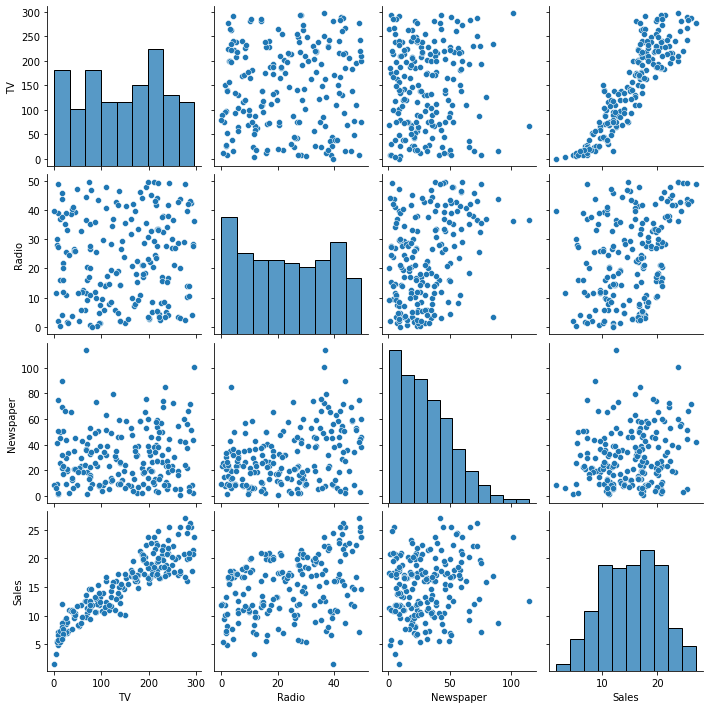

In [10]:
sns.pairplot(data = data5)

In [7]:
x = data5[['TV']].values
y = data5['Sales'].values

Text(0, 0.5, 'Sales')

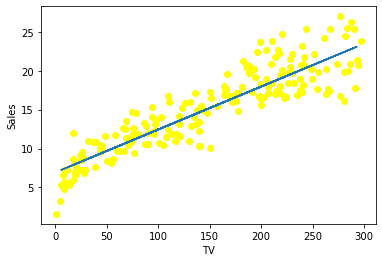

In [14]:
plt.scatter(x,y, c = 'yellow')
plt.plot(X_test,y_pred)
plt.xlabel('TV')
plt.ylabel('Sales')

In [9]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.20, random_state = 22)

In [10]:
reg=LinearRegression()

In [11]:
reg.fit(X_train,Y_train)

LinearRegression()

In [12]:
y_pred = reg.predict(X_test)

In [13]:
print('Mean absolute error :', metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared error :', metrics.mean_squared_error(Y_test,y_pred))
print('Root mean squared error :', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('R2 score :', metrics.r2_score(Y_test,y_pred))

Mean absolute error : 1.503701911786235
Mean Squared error : 3.851390399241871
Root mean squared error : 1.9624959615861306
R2 score : 0.8597306197944476


In [ ]:
reg.predict([[5251]])

## clustering

In [17]:
c_data = data5.drop('City',axis = 1)

In [18]:
c_data

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(4)

In [21]:
kmeans.fit(c_data)

KMeans(n_clusters=4)

In [22]:
kmeans.predict(c_data)

array([0, 1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 3, 2, 2, 1, 0, 1, 3, 2, 0,
       1, 0, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 3, 0, 0, 3, 1, 0, 2, 2, 0, 2,
       1, 2, 3, 0, 0, 1, 2, 3, 2, 2, 0, 2, 1, 3, 2, 2, 1, 0, 0, 3, 3, 1,
       1, 3, 0, 2, 2, 3, 1, 3, 2, 1, 1, 3, 1, 3, 3, 0, 3, 1, 2, 2, 3, 3,
       3, 3, 3, 1, 2, 0, 3, 2, 2, 2, 0, 3, 2, 0, 0, 2, 0, 3, 1, 3, 1, 0,
       0, 0, 2, 2, 3, 3, 3, 3, 3, 1, 3, 1, 2, 3, 0, 3, 1, 3, 2, 1, 1, 0,
       1, 2, 1, 1, 1, 0, 1, 2, 3, 2, 2, 3, 3, 3, 0, 0, 1, 1, 0, 3, 2, 2,
       2, 1, 3, 3, 1, 3, 2, 3, 2, 2, 3, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 3, 2, 0, 1, 1, 3, 1, 2, 3, 1, 3, 2,
       0, 0])

In [23]:
c_data['cluster'] = kmeans.predict(c_data)

In [24]:
c_data

TV  Radio  Newspaper  Sales  cluster
0    230.1   37.8       69.2   22.1        0
1     44.5   39.3       45.1   10.4        1
2     17.2   45.9       69.3   12.0        1
3    151.5   41.3       58.5   16.5        2
4    180.8   10.8       58.4   17.9        2
..     ...    ...        ...    ...      ...
195   38.2    3.7       13.8    7.6        1
196   94.2    4.9        8.1   14.0        3
197  177.0    9.3        6.4   14.8        2
198  283.6   42.0       66.2   25.5        0
199  232.1    8.6        8.7   18.4        0

[200 rows x 5 columns]

In [25]:
c_data['cluster'].value_counts()

2    55
3    52
1    49
0    44
Name: cluster, dtype: int64

In [26]:
kmeans.inertia_

234023.58458648497

In [27]:
cc = c_data.drop('cluster', axis = 1)

In [30]:
inertia = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(cc)
    inertia.append(kmeans.inertia_)
print(inertia)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1610627.4903000002, 477825.7766186475, 306206.4991797857, 234040.51257905146, 192742.0518722638, 172921.1970567895, 154858.12281796848, 134329.0445367822, 122883.02120090327]


In [31]:
inertia

[1610627.4903000002,
 477825.7766186475,
 306206.4991797857,
 234040.51257905146,
 192742.0518722638,
 172921.1970567895,
 154858.12281796848,
 134329.0445367822,
 122883.02120090327]

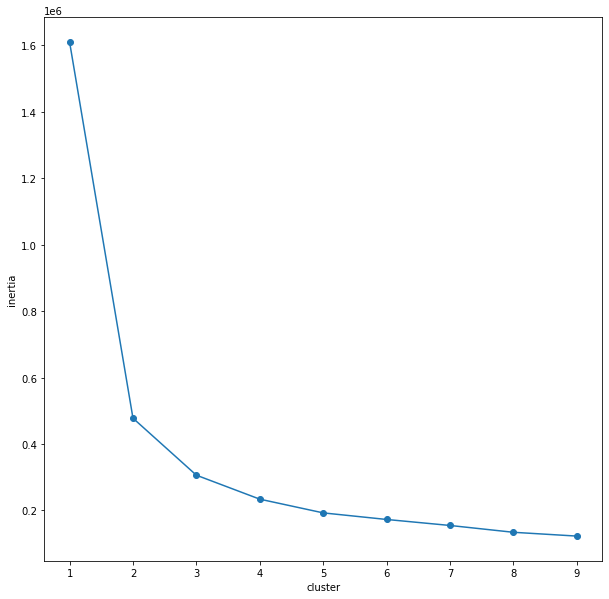

In [33]:
plt.figure(figsize = (10,10))
plt.plot(range(1,10),inertia, marker = 'o')
plt.xlabel('cluster')
plt.ylabel('inertia')
plt.show()

# ----------------------------------------------------------------------------------------------------------

In [34]:
data7

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0      0.9947       424428  0.7831        1.2976     0.9374       0.8750   
1      0.9974       339014  0.7795        1.2161     0.9773       0.9065   
2      0.9962       528876  0.7657        1.3150     0.9446       0.8706   
3      0.9948       418255  0.7759        1.2831     0.9458       0.8791   
4      0.9908       350797  0.7569        1.3108     0.9358       0.8707   
..        ...          ...     ...           ...        ...          ...   
893    0.9785       261028  0.7269        1.4499     0.8658       0.8243   
894    0.9466       386566  0.6695        1.5510     0.6475       0.7979   
895    0.9925       256255  0.7240        1.7159     0.8609       0.7613   
896    0.9604       248795  0.6954        1.6220     0.8263       0.7697   
897    0.9781       351472  0.6941        1.5405     0.8243       0.8031   

     SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  Class  
0           0.0020         0.0015         0.7657         0.9936  BERHI  
1           0.0021         0.0018         0.8218         0.9993  BERHI  
2           0.0018         0.0014         0.7580         0.9968  BERHI  
3           0.0020         0.0016         0.7727         0.9915  BERHI  
4           0.0022         0.0017         0.7582         0.9938  BERHI  
..             ...            ...            ...            ...    ...  
893         0.0027         0.0019         0.6794         0.9850  SOGAY  
894         0.0023         0.0015         0.6366         0.9875  SOGAY  
895         0.0029         0.0017         0.5796         0.9945  SOGAY  
896         0.0030         0.0018         0.5924         0.9609  SOGAY  
897         0.0024         0.0016         0.6449         0.9935  SOGAY  

[898 rows x 17 columns]

<AxesSubplot:xlabel='MAJOR_AXIS', ylabel='MINOR_AXIS'>

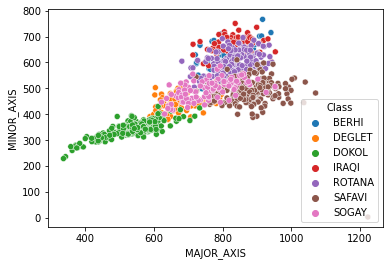

In [35]:
sns.scatterplot(x = data7['MAJOR_AXIS'], y = data7['MINOR_AXIS'], hue = data7['Class'])

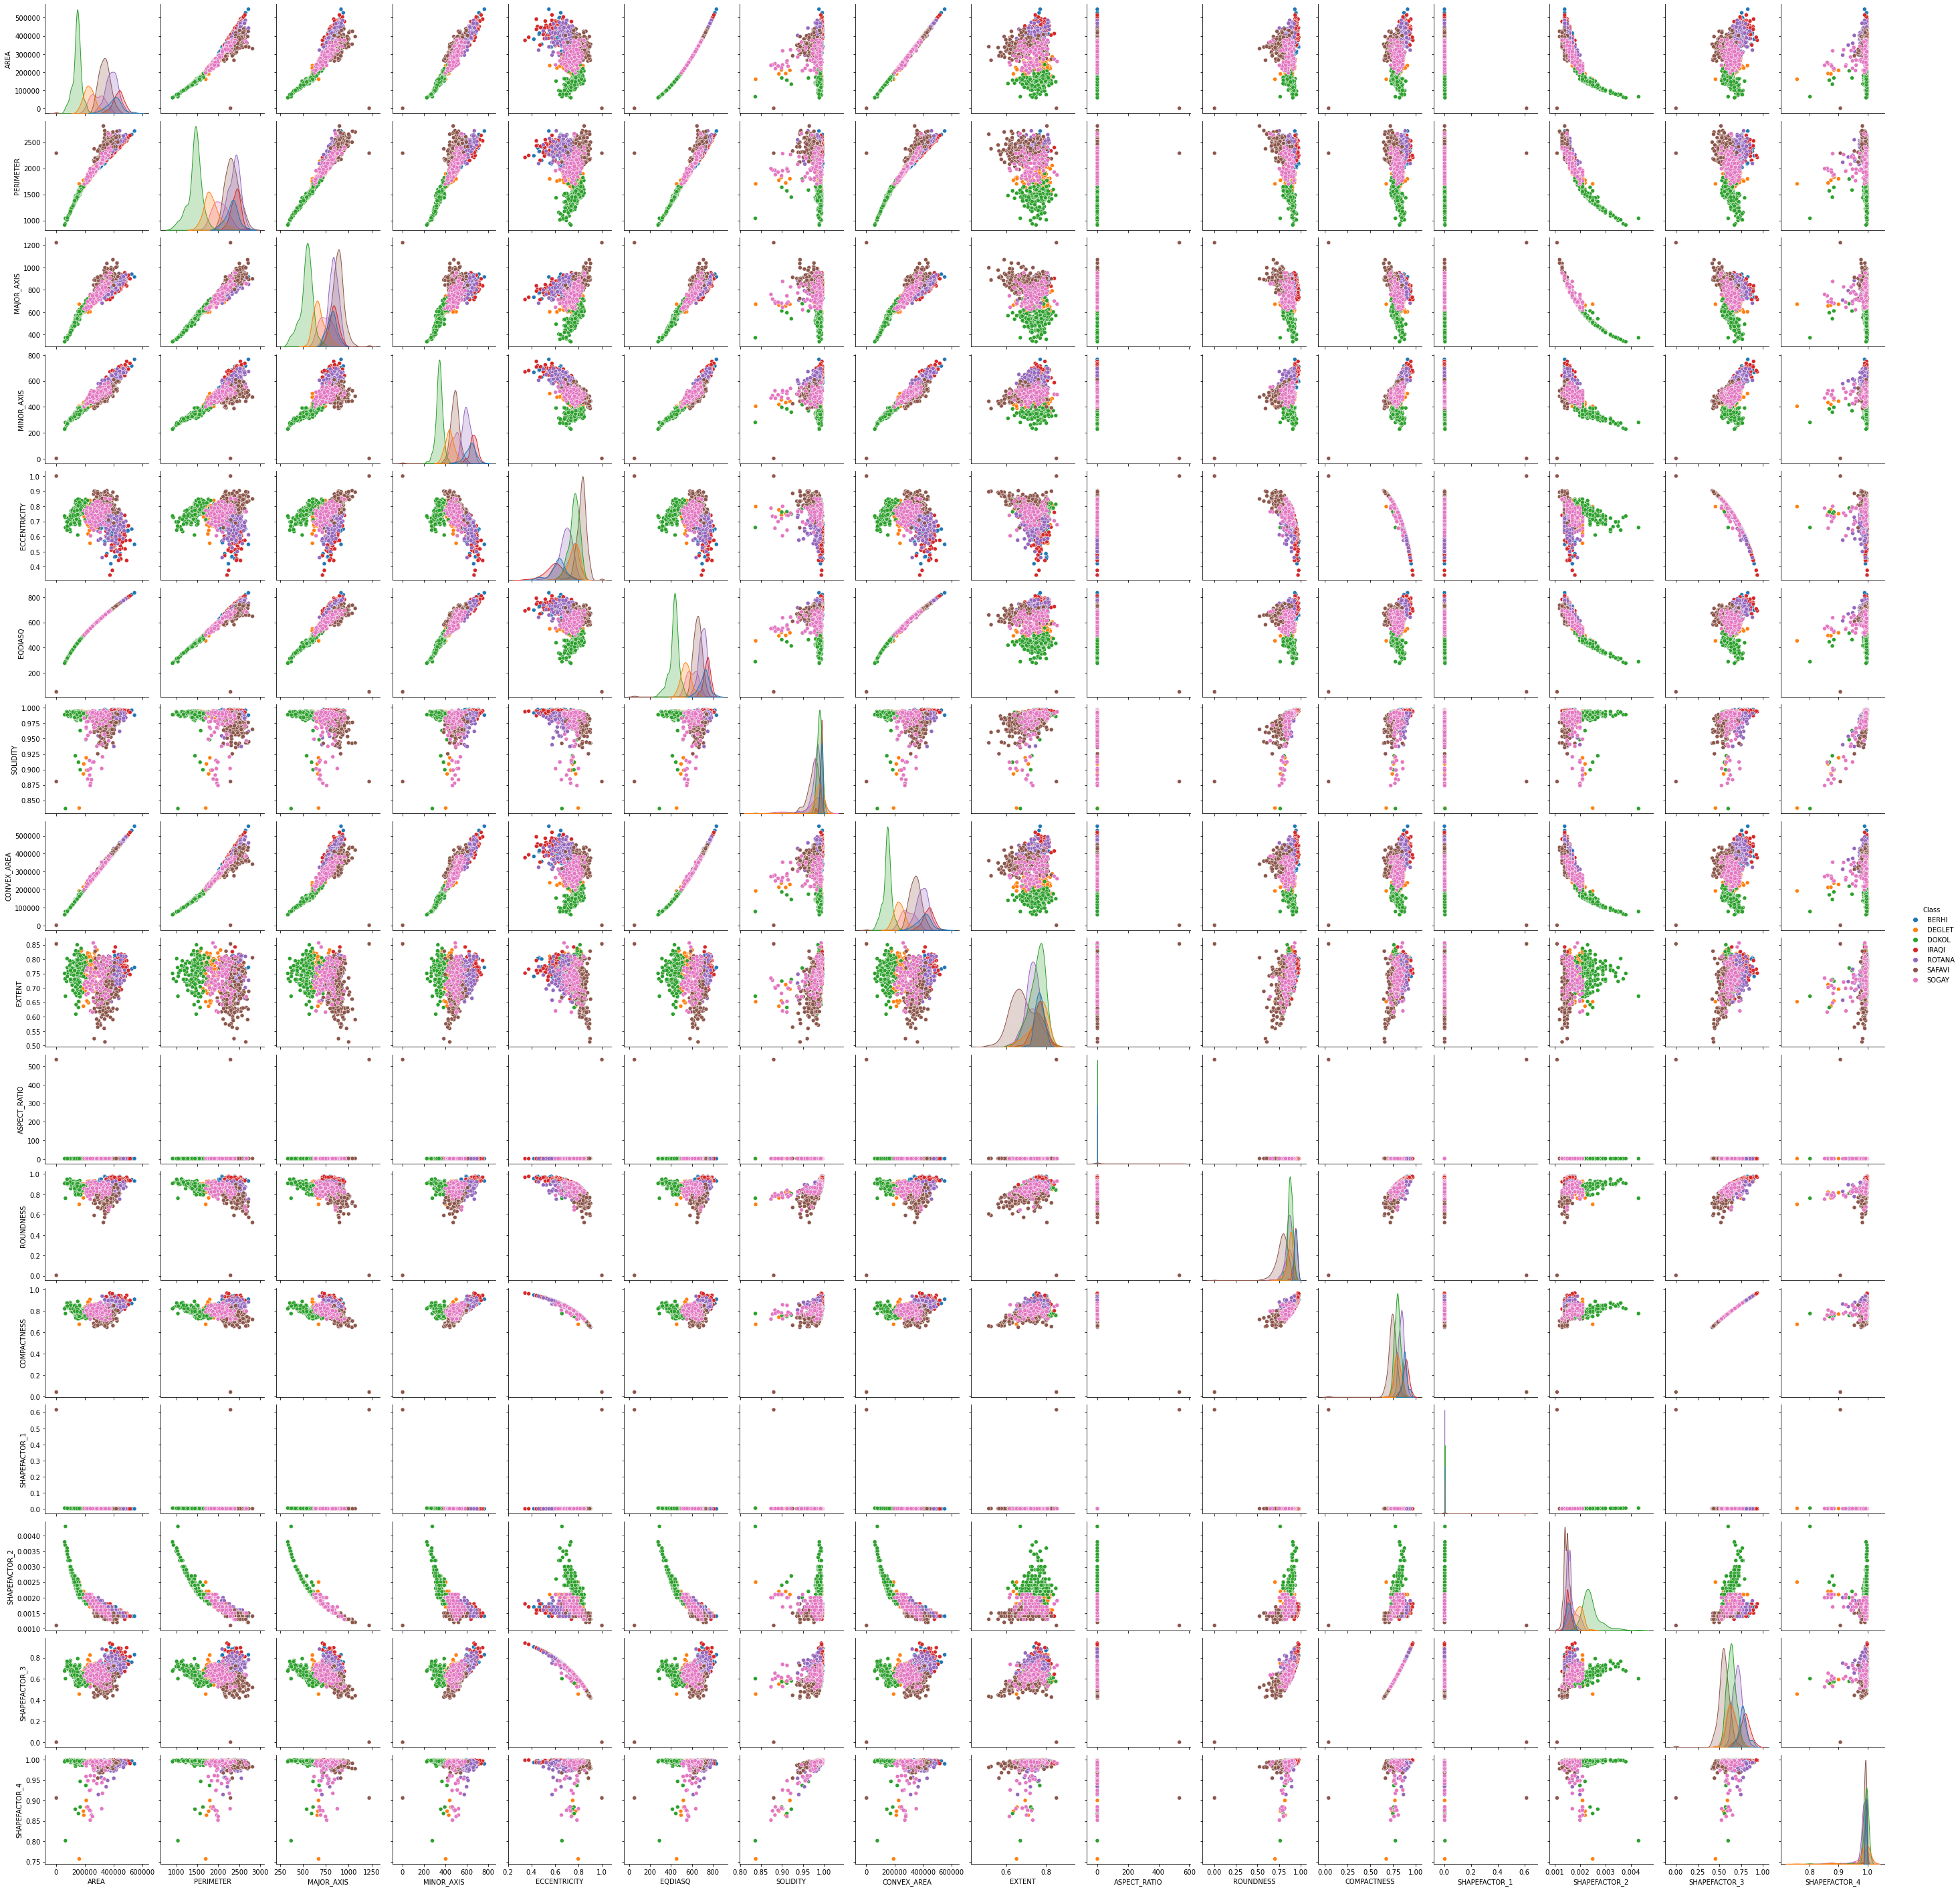

In [36]:
sns.pairplot(data = data7,hue = 'Class')

In [ ]:
data7.corr()

In [37]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  Class          898 non-null    object 
dtypes: float64(14), int64(2), object(1)
memory usage: 119.

In [38]:
data7.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

In [47]:
data7.drop('Class', axis = 1, inplace = True)

In [48]:
from sklearn.cluster import KMeans

In [59]:
Kmeans = KMeans(2)

In [60]:
Kmeans.fit(data7)

KMeans(n_clusters=2)

In [61]:
Kmeans.predict(data7)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [62]:
Kmeans.inertia_

5045906799834.345

In [63]:
inertia1 = []
for j in range(1,10):
    Kmeans = KMeans(j)
    Kmeans.fit(data7)
    inertia1.append(Kmeans.inertia_)
print(inertia1)

[20938310231534.684, 5045906799834.345, 2408629094545.0703, 1384255841963.2388, 973365141685.5117, 746724965656.9803, 553129173465.6388, 427242011133.26306, 342555067724.4226]


In [64]:
inertia1

[20938310231534.684,
 5045906799834.345,
 2408629094545.0703,
 1384255841963.2388,
 973365141685.5117,
 746724965656.9803,
 553129173465.6388,
 427242011133.26306,
 342555067724.4226]

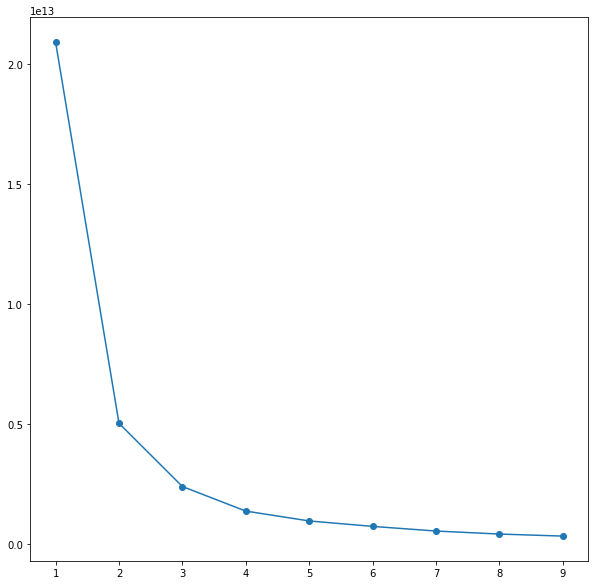

In [66]:
plt.figure(figsize=(10,10))
plt.plot(range(1,10),inertia1, marker = 'o')
plt.show()

In [81]:
aa = data7  ##for scaling

In [70]:
aa

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0      0.9947       424428  0.7831        1.2976     0.9374       0.8750   
1      0.9974       339014  0.7795        1.2161     0.9773       0.9065   
2      0.9962       528876  0.7657        1.3150     0.9446       0.8706   
3      0.9948       418255  0.7759        1.2831     0.9458       0.8791   
4      0.9908       350797  0.7569        1.3108     0.9358       0.8707   
..        ...          ...     ...           ...        ...          ...   
893    0.9785       261028  0.7269        1.4499     0.8658       0.8243   
894    0.9466       386566  0.6695        1.5510     0.6475       0.7979   
895    0.9925       256255  0.7240        1.7159     0.8609       0.7613   
896    0.9604       248795  0.6954        1.6220     0.8263       0.7697   
897    0.9781       351472  0.6941        1.5405     0.8243       0.8031   

     SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  
0           0.0020         0.0015         0.7657         0.9936  
1           0.0021         0.0018         0.8218         0.9993  
2           0.0018         0.0014         0.7580         0.9968  
3           0.0020         0.0016         0.7727         0.9915  
4           0.0022         0.0017         0.7582         0.9938  
..             ...            ...            ...            ...  
893         0.0027         0.0019         0.6794         0.9850  
894         0.0023         0.0015         0.6366         0.9875  
895         0.0029         0.0017         0.5796         0.9945  
896         0.0030         0.0018         0.5924         0.9609  
897         0.0024         0.0016         0.6449         0.9935  

[898 rows x 16 columns]

In [68]:
ss = StandardScaler()

In [71]:
aa = ss.fit_transform(aa)

In [72]:
kMeans = KMeans(4)

In [73]:
kMeans.fit(aa)

KMeans(n_clusters=4)

In [78]:
kMeans.predict(aa)

array([8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 8, 2, 8, 8,
       8, 7, 8, 8, 8, 2, 8, 2, 8, 7, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 2, 2, 8, 8, 7,
       7, 7, 1, 7, 1, 7, 7, 1, 1, 7, 1, 1, 7, 7, 7, 1, 7, 7, 7, 7, 7, 6,
       7, 5, 7, 6, 6, 1, 6, 7, 7, 7, 7, 5, 6, 7, 7, 7, 7, 6, 6, 7, 7, 7,
       7, 7, 1, 7, 1, 7, 5, 6, 7, 2, 7, 7, 6, 7, 7, 7, 7, 7, 5, 7, 7, 1,
       7, 7, 6, 6, 7, 1, 7, 7, 7, 6, 6, 7, 7, 7, 7, 6, 5, 7, 7, 7, 7, 6,
       7, 7, 6, 6, 6, 7, 6, 7, 7, 0, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 0,
       6, 6, 0, 6, 6, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 6, 0, 6, 6, 0, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 0, 6, 0, 7, 6, 0, 0, 6, 6, 6, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0,
       6, 6, 6, 0, 6, 0, 6, 6, 6, 0, 6, 6, 6, 0, 6, 6, 0, 6, 0, 0, 5, 6,
       0, 6, 0, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 0, 0, 0, 6, 6,
       0, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 7, 6, 0, 6,

In [75]:
kMeans.inertia_

4973.013430731368

In [76]:
scale_inertia = []
for q in range(1,10):
    kMeans = KMeans(q)
    kMeans.fit(aa)
    scale_inertia.append(kMeans.inertia_)
print(scale_inertia)

[14368.0, 9696.231189299611, 7174.887834798161, 4972.866143805044, 3828.9735362376987, 3213.237215372271, 2802.315814738474, 2564.5457275263266, 2370.572900840839]


In [77]:
scale_inertia

[14368.0,
 9696.231189299611,
 7174.887834798161,
 4972.866143805044,
 3828.9735362376987,
 3213.237215372271,
 2802.315814738474,
 2564.5457275263266,
 2370.572900840839]

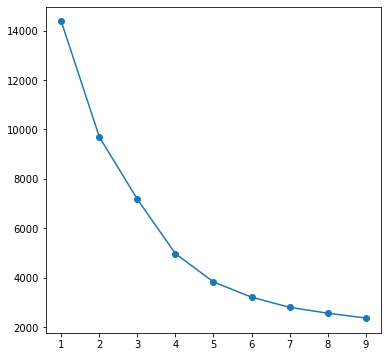

In [80]:
plt.figure(figsize=(6,6))
plt.plot(range(1,10),scale_inertia, marker = 'o')
plt.show()

 5 is the optimal cluster for this dataset after scaling

# -----------------------------------------------------------------------------------------------------------

In [84]:
df = pd.read_csv('Health_insurance - Health_insurance.csv')

In [85]:
df

age     sex     bmi  children smoker     region       charges
0     19  female    27.9       0.0    yes  southwest    16884.924$
1     18    male   33.77       1.0     no  southeast    1725.5523$
2     28    male      33       3.0     no  southeast     4449.462$
3     33    male  22.705       0.0     no  northwest  21984.47061$
4     32    male   28.88       0.0     no  northwest    3866.8552$
...   ..     ...     ...       ...    ...        ...           ...
1558  42    male    20.3       NaN     no  southwest    1984.4533$
1559  48    male    35.3       NaN     no  southwest     2457.502$
1560  39    male   24.32       NaN     no  southeast    12146.971$
1561  63    male    18.5       NaN     no  southwest    9566.9909$
1562  54  female   26.41       NaN     no  northeast   13112.6048$

[1563 rows x 7 columns]

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1563 non-null   object 
 1   sex       1563 non-null   object 
 2   bmi       1562 non-null   object 
 3   children  1542 non-null   float64
 4   smoker    1563 non-null   object 
 5   region    1563 non-null   object 
 6   charges   1563 non-null   object 
dtypes: float64(1), object(6)
memory usage: 85.6+ KB


In [112]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [88]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Removing null and noise

In [111]:
col = ['bmi','children']
for i in col:
    df[i] = df[i].fillna(df[i].median())

In [ ]:
df.fillna(0, inplace = True)

In [92]:
df['age'].unique() #finding unique value

array(['19', '18', '28', '33', '32', '31', '46', '37', '60', '25', '62',
       '23', '56', '27', '52', '30', '34', '59', '63', '55', '22', '26',
       '35', '24', '41', '38', '36', '21', '48', '40', '58', '53', '43',
       '64', '20', '61', '44', '57', '29', '45', '54', '49', '47', '51',
       '42', '50', '39', '" "'], dtype=object)

In [93]:
df[df['age'] == '" "']

age   sex     bmi  children smoker     region      charges
1320  " "  male  31.065       3.0     no  northwest  5425.02335$

In [94]:
df.drop([1320], axis = 0, inplace = True) #removing null values

In [95]:
df[df['age'] == '" "'] #values dropped

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

In [96]:
df['age'] = df['age'].astype(int) # changing data type

In [97]:
df['age'].dtype

dtype('int32')

In [102]:
df['sex'].unique() #finding noise

array(['female', 'male'], dtype=object)

In [99]:
df[df['sex'] == '0']

age sex    bmi  children smoker     region      charges
1184   23   0  28.49       1.0    yes  southeast  18328.2381$

In [100]:
df[df['sex'] == '%']

age sex   bmi  children smoker     region     charges
1332   52   %  44.7       3.0     no  southwest  11411.685$

In [101]:
df.drop([1184], axis = 0, inplace = True) #droping values
df.drop([1332], axis = 0, inplace = True)

In [103]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [89]:
df['bmi'].unique()

array(['27.9', '33.77', '33', '22.705', '28.88', '25.74', '33.44',
       '27.74', '29.83', '25.84', '26.22', '26.29', '34.4', '39.82',
       '42.13', '24.6', '30.78', '23.845', '40.3', '35.3', '36.005',
       '32.4', '34.1', '31.92', '28.025', '27.72', '23.085', '32.775',
       '17.385', '36.3', '35.6', '26.315', '28.6', '28.31', '36.4',
       '20.425', '32.965', '20.8', '36.67', '39.9', '26.6', '36.63',
       '21.78', '30.8', '37.05', '37.3', '38.665', '34.77', '24.53',
       '35.2', '35.625', '33.63', '28', '34.43', '28.69', '36.955',
       '31.825', '31.68', '22.88', '37.335', '27.36', '33.66', '24.7',
       '25.935', '22.42', '28.9', '39.1', '36.19', '23.98', '24.75',
       '28.5', '28.1', '32.01', '27.4', '34.01', '29.59', '35.53',
       '39.805', '26.885', '38.285', '37.62', '41.23', '34.8', '22.895',
       '31.16', '27.2', '26.98', '39.49', '24.795', '31.3', '38.28',
       '19.95', '19.3', '31.6', '25.46', '30.115', '29.92', '27.5',
       '28.4', '30.875', '27.94',

In [107]:
df['bmi'] = df['bmi'].astype(float) #fidning null through error value

In [105]:
df[df['bmi'] == '%']

age   sex bmi  children smoker     region     charges
1138   33  male   %       0.0     no  southeast  3704.3545$

In [106]:
df.drop([1138], axis = 0, inplace = True)

In [108]:
df['bmi'].dtype

dtype('float64')

In [113]:
df['children'].unique()

array([0., 1., 3., 2., 5., 4.])

In [110]:
df['children'].dtype

dtype('float64')

In [114]:
df['smoker'].unique()

array(['yes', 'no', '-', '0'], dtype=object)

In [115]:
df[df['smoker'] == '-']

age     sex    bmi  children smoker     region     charges
650   49  female  42.68       2.0      -  southeast  9800.8882$

In [116]:
df.drop([650], axis = 0, inplace = True)

In [117]:
df[df['smoker'] == '0']

age     sex     bmi  children smoker     region       charges
818   47  female  26.125       1.0      0  northeast  23401.30575$

In [118]:
df.drop([818], axis = 0,inplace = True)

In [119]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [120]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast', '" "'],
      dtype=object)

In [121]:
df[df['region'] == '" "']

age     sex     bmi  children smoker region      charges
1188   43  female  25.270       1.0    yes    " "  21771.3423$
1323   42  female  40.370       2.0    yes    " "  43896.3763$
1348   22  female  23.845       0.0     no    " "   4433.9159$

In [122]:
df.drop([1188], axis = 0,inplace = True)
df.drop([1323], axis = 0,inplace = True)
df.drop([1348], axis = 0,inplace = True)

In [123]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [124]:
df['charges'].unique()

array(['16884.924$', '1725.5523$', '4449.462$', ..., '18328.2381$',
       '21771.3423$', '9800.8882$'], dtype=object)

In [125]:
df['charges'] = df['charges'].str.replace('$', '')

C:\Users\singh\AppData\Local\Temp\ipykernel_11972\3707073656.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['charges'] = df['charges'].str.replace('$', '')


In [135]:
df['charges'] = df['charges'].astype(float) #finding errors

In [127]:
df[df['charges'] == '-']

age     sex     bmi  children smoker     region charges
232    19  female  17.800       0.0     no  southwest       -
316    50    male  32.205       0.0     no  northwest       -
411    44  female  20.235       1.0    yes  northeast       -
492    18  female  25.080       0.0     no  northeast       -
578    52    male  30.200       1.0     no  southwest       -
1328   23  female  24.225       2.0     no  northeast       -

In [128]:
df[df['charges'] == " '"]

age   sex    bmi  children smoker     region charges
409   32  male  30.03       1.0     no  southeast       '

In [129]:
df[df['charges'] == '']

age   sex    bmi  children smoker     region charges
529   18  male  25.46       0.0     no  northeast

In [130]:
df.drop([232], axis = 0,inplace = True)
df.drop([316], axis = 0,inplace = True)
df.drop([411], axis = 0,inplace = True)
df.drop([578], axis = 0,inplace = True)
df.drop([1328], axis = 0,inplace = True)

In [131]:
df.drop([409], axis = 0,inplace = True)

In [132]:
df.drop([492], axis = 0,inplace = True)

In [133]:
df.drop([529], axis = 0,inplace = True)

In [136]:
df['charges'].dtype

dtype('float64')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 0 to 1562
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1546 non-null   int32  
 1   sex       1546 non-null   object 
 2   bmi       1546 non-null   float64
 3   children  1546 non-null   float64
 4   smoker    1546 non-null   object 
 5   region    1546 non-null   object 
 6   charges   1546 non-null   float64
dtypes: float64(3), int32(1), object(3)
memory usage: 90.6+ KB


In [138]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [139]:
df[df.duplicated()]

age   sex    bmi  children smoker     region    charges
581   19  male  30.59       0.0     no  northwest  1639.5631

In [140]:
df.drop([581], axis = 0, inplace = True)

In [141]:
df[df.duplicated()]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

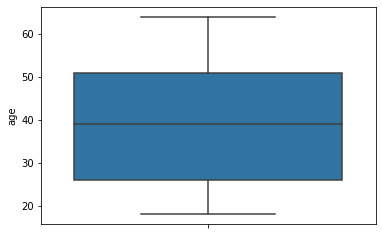

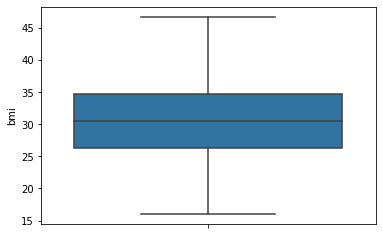

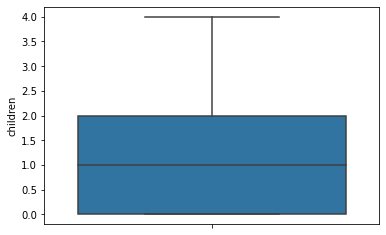

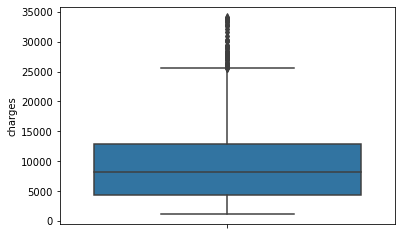

In [142]:
col=['age','bmi','children','charges']
for c in col:
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[(df[c]<upper_limit) & (df[c]>lower_limit)]
  plt.figure()
  sns.boxplot(y=c, data=df)

### cleaning has been done, now encoding req col

In [143]:
le = LabelEncoder()

In [144]:
oe = OneHotEncoder()

In [149]:
df.reset_index(inplace = True)

In [151]:
df.drop('index', axis = 1, inplace = True)

In [152]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1347   42    male  20.300       1.0     no  southwest   1984.45330
1348   48    male  35.300       1.0     no  southwest   2457.50200
1349   39    male  24.320       1.0     no  southeast  12146.97100
1350   63    male  18.500       1.0     no  southwest   9566.99090
1351   54  female  26.410       1.0     no  northeast  13112.60480

[1352 rows x 7 columns]

In [153]:
df.corr()

age       bmi  children   charges
age       1.000000  0.104580  0.058789  0.377648
bmi       0.104580  1.000000  0.009600 -0.038149
children  0.058789  0.009600  1.000000  0.098668
charges   0.377648 -0.038149  0.098668  1.000000

<AxesSubplot:>

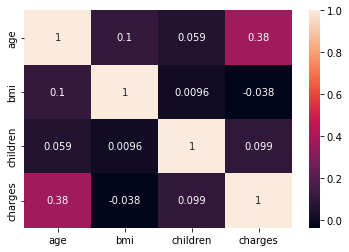

In [154]:
sns.heatmap(df.corr(), annot = True)

In [155]:
df['sex']=le.fit_transform(df['sex'])

In [156]:
df['smoker'] = le.fit_transform(df['smoker'])

In [157]:
df

age  sex     bmi  children  smoker     region      charges
0      19    0  27.900       0.0       1  southwest  16884.92400
1      18    1  33.770       1.0       0  southeast   1725.55230
2      28    1  33.000       3.0       0  southeast   4449.46200
3      33    1  22.705       0.0       0  northwest  21984.47061
4      32    1  28.880       0.0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1347   42    1  20.300       1.0       0  southwest   1984.45330
1348   48    1  35.300       1.0       0  southwest   2457.50200
1349   39    1  24.320       1.0       0  southeast  12146.97100
1350   63    1  18.500       1.0       0  southwest   9566.99090
1351   54    0  26.410       1.0       0  northeast  13112.60480

[1352 rows x 7 columns]

In [158]:
df1=pd.DataFrame(oe.fit_transform(df[['region']]).toarray(),columns = ['southwest', 'southeast', 'northwest', 'northeast'])
  
#Merge with main
New_df=df.join(df1)

In [159]:
New_df1=df.join(df1)

In [160]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
New_df.fillna(0, inplace = True)

In [161]:
New_df

age  sex     bmi  children  smoker     region      charges  southwest  \
0      19    0  27.900       0.0       1  southwest  16884.92400        0.0   
1      18    1  33.770       1.0       0  southeast   1725.55230        0.0   
2      28    1  33.000       3.0       0  southeast   4449.46200        0.0   
3      33    1  22.705       0.0       0  northwest  21984.47061        0.0   
4      32    1  28.880       0.0       0  northwest   3866.85520        0.0   
...   ...  ...     ...       ...     ...        ...          ...        ...   
1347   42    1  20.300       1.0       0  southwest   1984.45330        0.0   
1348   48    1  35.300       1.0       0  southwest   2457.50200        0.0   
1349   39    1  24.320       1.0       0  southeast  12146.97100        0.0   
1350   63    1  18.500       1.0       0  southwest   9566.99090        0.0   
1351   54    0  26.410       1.0       0  northeast  13112.60480        1.0   

      southeast  northwest  northeast  
0           0.0        0.0        1.0  
1           0.0        1.0        0.0  
2           0.0        1.0        0.0  
3           1.0        0.0        0.0  
4           1.0        0.0        0.0  
...         ...        ...        ...  
1347        0.0        0.0        1.0  
1348        0.0        0.0        1.0  
1349        0.0        1.0        0.0  
1350        0.0        0.0        1.0  
1351        0.0        0.0        0.0  

[1352 rows x 11 columns]

In [ ]:
New_df.columns

In [162]:
New_df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
southwest    0
southeast    0
northwest    0
northeast    0
dtype: int64

In [163]:
New_df['northeast'].unique()

array([1., 0.])

In [ ]:
New_df['northeast'] = New_df['northeast'].astype(float)

In [164]:
x = New_df[['age', 'sex', 'bmi', 'children', 'smoker','northeast']].values
y = New_df['charges'].values

In [165]:
y

array([16884.924 ,  1725.5523,  4449.462 , ..., 12146.971 ,  9566.9909,
       13112.6048])

In [228]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.20, random_state = 15)

In [229]:
scaler = StandardScaler()

In [230]:
X_train=scaler.fit_transform(X_train)

In [231]:
X_test=scaler.transform(X_test)

In [232]:
reg = LinearRegression()

In [233]:
reg.fit(X_train,Y_train)

LinearRegression()

In [234]:
y_pred = reg.predict(X_test) ## fortesting

In [235]:
y_train_pred = reg.predict(X_train)

In [236]:
reg.intercept_

9889.008242034228

In [237]:
reg.coef_

array([2882.9454188 ,  -31.22171619,  303.43571124,  384.81951792,
       3931.50703443, -346.33447747])

In [238]:
print('Mean absolute error :', metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared error :', metrics.mean_squared_error(Y_test,y_pred))
print('Root mean squared error :', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('R2 score :', metrics.r2_score(Y_test,y_pred))

Mean absolute error : 3218.0025280666287
Mean Squared error : 26662251.73889236
Root mean squared error : 5163.550303705035
R2 score : 0.3906156037367784


In [239]:
print('Mean absolute error :', metrics.mean_absolute_error(Y_train,y_train_pred))
print('Mean Squared error :', metrics.mean_squared_error(Y_train,y_train_pred))
print('Root mean squared error :', np.sqrt(metrics.mean_squared_error(Y_train,y_train_pred)))
print('R2 score :', metrics.r2_score(Y_train,y_train_pred))

Mean absolute error : 3280.791426228532
Mean Squared error : 30069982.744784005
Root mean squared error : 5483.610374997845
R2 score : 0.4249542115374151


## Decesion Tree for regression

In [253]:
New_df

age  sex     bmi  children  smoker     region      charges  southwest  \
0      19    0  27.900       0.0       1  southwest  16884.92400        0.0   
1      18    1  33.770       1.0       0  southeast   1725.55230        0.0   
2      28    1  33.000       3.0       0  southeast   4449.46200        0.0   
3      33    1  22.705       0.0       0  northwest  21984.47061        0.0   
4      32    1  28.880       0.0       0  northwest   3866.85520        0.0   
...   ...  ...     ...       ...     ...        ...          ...        ...   
1347   42    1  20.300       1.0       0  southwest   1984.45330        0.0   
1348   48    1  35.300       1.0       0  southwest   2457.50200        0.0   
1349   39    1  24.320       1.0       0  southeast  12146.97100        0.0   
1350   63    1  18.500       1.0       0  southwest   9566.99090        0.0   
1351   54    0  26.410       1.0       0  northeast  13112.60480        1.0   

      southeast  northwest  northeast  
0           0.0        0.0        1.0  
1           0.0        1.0        0.0  
2           0.0        1.0        0.0  
3           1.0        0.0        0.0  
4           1.0        0.0        0.0  
...         ...        ...        ...  
1347        0.0        0.0        1.0  
1348        0.0        0.0        1.0  
1349        0.0        1.0        0.0  
1350        0.0        0.0        1.0  
1351        0.0        0.0        0.0  

[1352 rows x 11 columns]

In [256]:
DF = New_df.drop(['age','region'], axis = 1)

In [257]:
DF

sex     bmi  children  smoker      charges  southwest  southeast  \
0       0  27.900       0.0       1  16884.92400        0.0        0.0   
1       1  33.770       1.0       0   1725.55230        0.0        0.0   
2       1  33.000       3.0       0   4449.46200        0.0        0.0   
3       1  22.705       0.0       0  21984.47061        0.0        1.0   
4       1  28.880       0.0       0   3866.85520        0.0        1.0   
...   ...     ...       ...     ...          ...        ...        ...   
1347    1  20.300       1.0       0   1984.45330        0.0        0.0   
1348    1  35.300       1.0       0   2457.50200        0.0        0.0   
1349    1  24.320       1.0       0  12146.97100        0.0        0.0   
1350    1  18.500       1.0       0   9566.99090        0.0        0.0   
1351    0  26.410       1.0       0  13112.60480        1.0        0.0   

      northwest  northeast  
0           0.0        1.0  
1           1.0        0.0  
2           1.0        0.0  
3           0.0        0.0  
4           0.0        0.0  
...         ...        ...  
1347        0.0        1.0  
1348        0.0        1.0  
1349        1.0        0.0  
1350        0.0        1.0  
1351        0.0        0.0  

[1352 rows x 9 columns]

In [266]:
X = DF.drop('charges', axis = 1).values
Y = DF['charges'].values

In [313]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .20, random_state = 10)

In [314]:
from sklearn.tree import DecisionTreeRegressor

In [315]:
dtr = DecisionTreeRegressor()

In [316]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [317]:
y1_pred = dtr.predict(x_test)

In [318]:
y1_pred.shape

(271,)

In [319]:
print('Mean absolute error :', metrics.mean_absolute_error(y_test,y1_pred))
print('Mean Squared error :', metrics.mean_squared_error(y_test,y1_pred))
print('Root mean squared error :', np.sqrt(metrics.mean_squared_error(y_test,y1_pred)))
print('R2 score :', metrics.r2_score(y_test,y1_pred))

Mean absolute error : 6962.662208431734
Mean Squared error : 84108021.16113345
Root mean squared error : 9171.042534037962
R2 score : -0.7730639808107498


## Random forest regression

In [320]:
from sklearn.ensemble import RandomForestRegressor

In [321]:
rfr = RandomForestRegressor()

In [322]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [323]:
y_rf_pred = rfr.predict(x_test)

In [324]:
print('Mean absolute error :', metrics.mean_absolute_error(y_test,y_rf_pred))
print('Mean Squared error :', metrics.mean_squared_error(y_test,y_rf_pred))
print('Root mean squared error :', np.sqrt(metrics.mean_squared_error(y_test,y_rf_pred)))
print('R2 score :', metrics.r2_score(y_test,y_rf_pred))

Mean absolute error : 5193.51938457037
Mean Squared error : 46246055.6123807
Root mean squared error : 6800.445251039133
R2 score : 0.025096366209906962


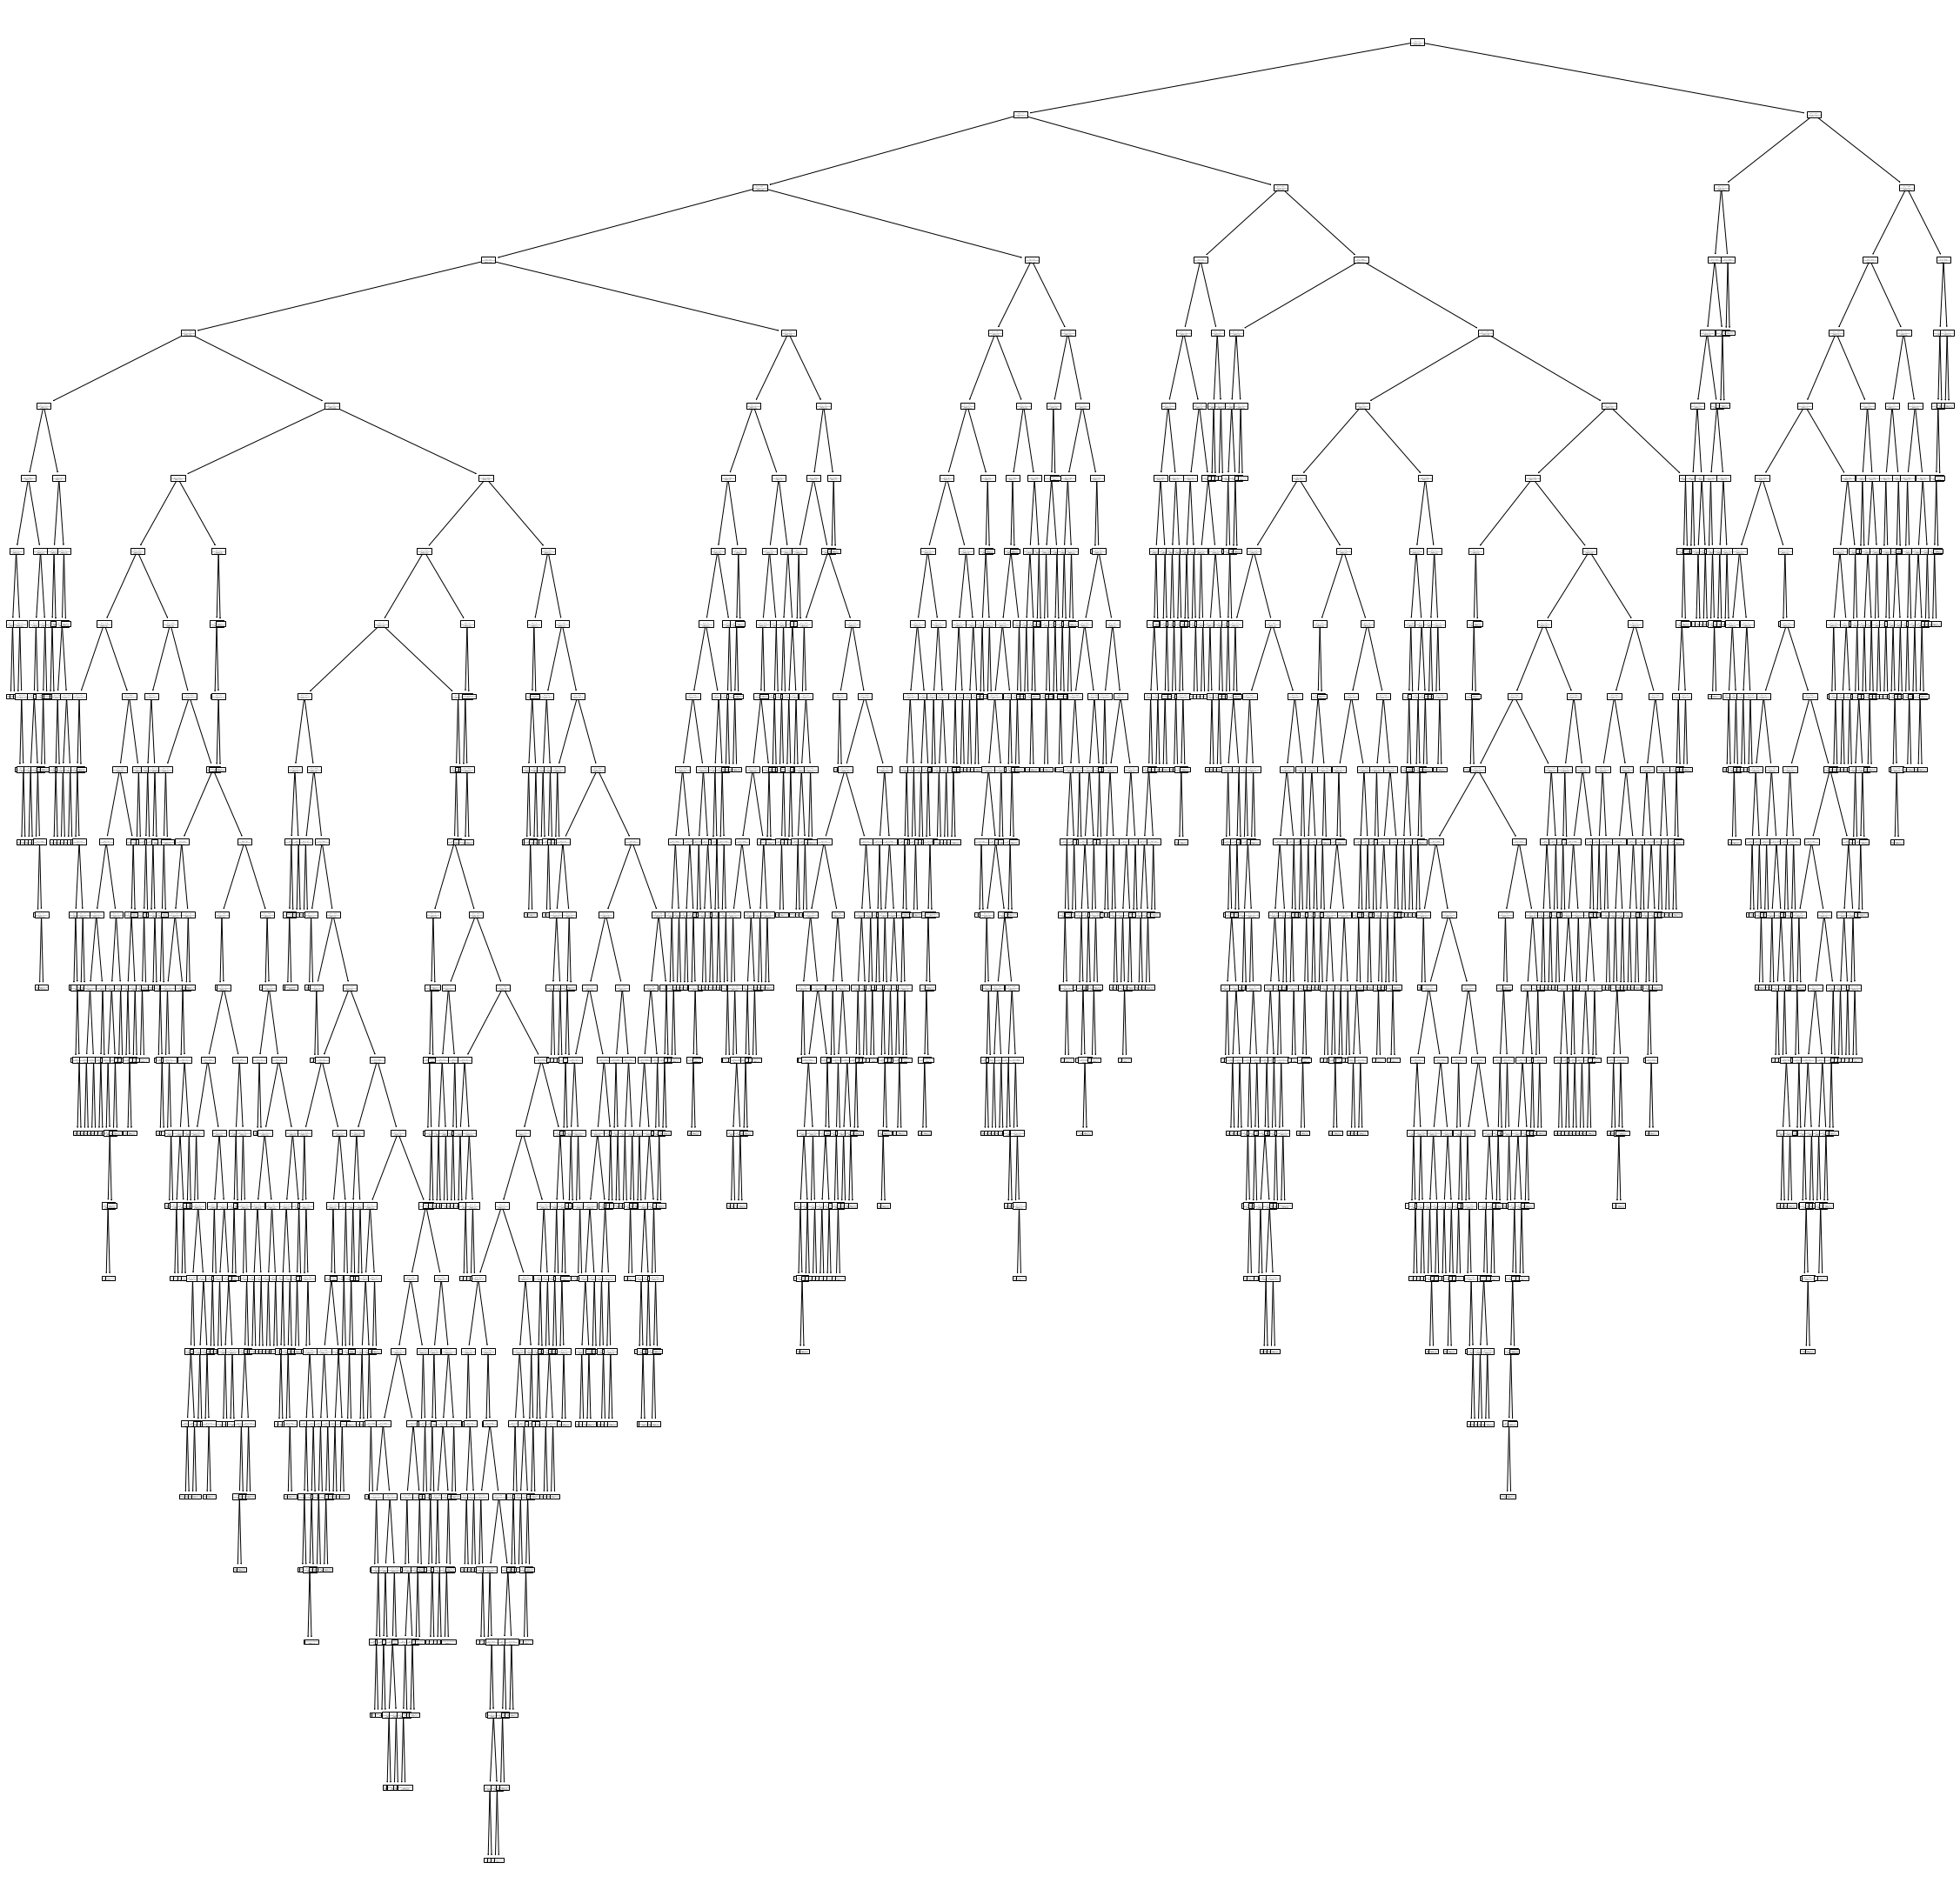

In [328]:
plt.figure(figsize =(40,40))
tree.plot_tree(dtr)
plt.show()

### random forest using random 100 values

In [329]:
DF

sex     bmi  children  smoker      charges  southwest  southeast  \
0       0  27.900       0.0       1  16884.92400        0.0        0.0   
1       1  33.770       1.0       0   1725.55230        0.0        0.0   
2       1  33.000       3.0       0   4449.46200        0.0        0.0   
3       1  22.705       0.0       0  21984.47061        0.0        1.0   
4       1  28.880       0.0       0   3866.85520        0.0        1.0   
...   ...     ...       ...     ...          ...        ...        ...   
1347    1  20.300       1.0       0   1984.45330        0.0        0.0   
1348    1  35.300       1.0       0   2457.50200        0.0        0.0   
1349    1  24.320       1.0       0  12146.97100        0.0        0.0   
1350    1  18.500       1.0       0   9566.99090        0.0        0.0   
1351    0  26.410       1.0       0  13112.60480        1.0        0.0   

      northwest  northeast  
0           0.0        1.0  
1           1.0        0.0  
2           1.0        0.0  
3           0.0        0.0  
4           0.0        0.0  
...         ...        ...  
1347        0.0        1.0  
1348        0.0        1.0  
1349        1.0        0.0  
1350        0.0        1.0  
1351        0.0        0.0  

[1352 rows x 9 columns]

In [334]:
r_DF = DF.sample(100)

In [339]:
r_DF.reset_index(inplace = True)

In [341]:
r_DF.drop('index', axis = 1, inplace = True)

In [342]:
r_DF

sex     bmi  children  smoker      charges  southwest  southeast  \
0     0  21.755       1.0       0  13725.47184        1.0        0.0   
1     1  28.880       0.0       0   3866.85520        0.0        1.0   
2     1  30.210       0.0       0  10231.49990        0.0        1.0   
3     1  23.300       0.0       0  11345.51900        0.0        0.0   
4     0  36.190       0.0       0   5920.10410        0.0        0.0   
..  ...     ...       ...     ...          ...        ...        ...   
95    0  25.800       1.0       0   9861.02500        0.0        0.0   
96    0  36.630       0.0       1   8252.28430        0.0        1.0   
97    0  22.515       0.0       0   2117.33885        0.0        1.0   
98    1  25.600       2.0       1  23306.54700        0.0        0.0   
99    0  32.300       2.0       0  29186.48236        1.0        0.0   

    northwest  northeast  
0         0.0        0.0  
1         0.0        0.0  
2         0.0        0.0  
3         0.0        1.0  
4         1.0        0.0  
..        ...        ...  
95        0.0        1.0  
96        0.0        0.0  
97        0.0        0.0  
98        0.0        1.0  
99        0.0        0.0  

[100 rows x 9 columns]

In [349]:
a = r_DF.drop('charges', axis = 1).values
b = r_DF['charges'].values

In [372]:
x1_train,x1_test,y1_train,y1_test = train_test_split(a,b,test_size = 20,random_state = 42)

In [373]:
n_estimators = [10,20,30,40,50,60,70,80,90,100,120,150]
max_features = ['sqrt','log2']
max_depth=np.linspace(10,120,10 ,dtype=int)
criterion = ['gini','entropy']
min_samples_split = np.linspace(2,20,2 ,dtype=int)

In [374]:
random_grid_reg = {'n_estimators' :n_estimators,
               'max_features' :max_features,
               'max_depth' :max_depth,
               'criterion' :criterion,
               'min_samples_split' :min_samples_split}

In [379]:
random_grid_reg

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150],
 'max_features': ['sqrt', 'log2'],
 'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': array([ 2, 20])}

In [380]:
from sklearn.model_selection import RandomizedSearchCV

In [381]:
rdsc = RandomizedSearchCV(estimator= rfr, param_distributions = random_grid_reg, cv = 6, n_iter = 8, n_jobs = 1)

In [378]:
rdsc.fit(x1_train,y1_train)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\singh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\singh\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\singh\anaconda3\lib\site-packages\jo

KeyError: 'gini'

# ----------------------------------------------------------------------------------------------------------

# Logistic regresion, Decesion tree, random forest 

In [440]:
data = data4

In [441]:
data

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN  

[215 rows x 15 columns]

In [442]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [443]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [444]:
data['salary'] = data['salary'].fillna(data['salary'].median())

In [445]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [446]:
data.drop('sl_no', axis = 1, inplace = True)

In [447]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [448]:
data['ssc_p'].unique()

array([67.  , 79.33, 65.  , 56.  , 85.8 , 55.  , 46.  , 82.  , 73.  ,
       58.  , 69.6 , 47.  , 77.  , 62.  , 63.  , 60.  , 79.  , 69.8 ,
       77.4 , 76.5 , 52.58, 71.  , 76.76, 64.  , 61.  , 87.  , 69.  ,
       51.  , 81.  , 78.  , 74.  , 49.  , 76.  , 70.89, 50.  , 75.2 ,
       54.4 , 40.89, 80.  , 60.4 , 68.  , 52.6 , 84.2 , 86.5 , 54.  ,
       83.  , 80.92, 69.7 , 75.  , 84.86, 64.6 , 56.6 , 59.  , 66.5 ,
       84.  , 81.7 , 70.  , 83.84, 59.6 , 66.  , 85.  , 52.  , 60.23,
       70.5 , 45.  , 61.08, 69.5 , 73.96, 68.2 , 60.8 , 72.  , 80.4 ,
       76.7 , 74.9 , 77.44, 77.67, 89.4 , 44.  , 75.4 , 53.  , 51.57,
       55.6 , 74.2 , 67.16, 63.3 , 67.9 , 48.  , 59.96, 63.4 , 73.24,
       77.8 , 56.28, 88.  , 78.5 , 61.8 , 65.2 , 83.96, 54.2 , 55.68,
       41.  , 83.33, 43.  , 80.6 ])

In [449]:
data['hsc_p'].unique()

array([91.  , 78.33, 68.  , 52.  , 73.6 , 49.8 , 49.2 , 64.  , 79.  ,
       70.  , 61.  , 68.4 , 55.  , 87.  , 47.  , 75.  , 66.2 , 67.  ,
       66.  , 65.  , 76.  , 60.8 , 60.  , 97.7 , 54.6 , 76.5 , 73.5 ,
       53.  , 81.  , 51.  , 78.  , 44.  , 58.  , 77.  , 63.16, 39.  ,
       73.  , 71.98, 62.  , 37.  , 73.2 , 61.12, 45.83, 66.6 , 71.4 ,
       65.58, 73.4 , 64.2 , 74.  , 78.5 , 70.29, 83.83, 64.8 , 70.4 ,
       80.  , 90.9 , 63.  , 89.83, 90.  , 57.  , 69.  , 62.5 , 82.  ,
       72.  , 50.  , 54.  , 72.8 , 40.  , 66.8 , 59.  , 71.  , 89.7 ,
       92.  , 56.  , 64.89, 65.66, 86.  , 58.66, 60.5 , 74.66, 69.4 ,
       49.  , 87.6 , 72.5 , 42.16, 67.2 , 50.83, 97.  , 71.5 , 60.33,
       62.83, 65.5 , 77.6 , 70.2 , 61.4 , 61.33, 42.  ])

In [450]:
data['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [451]:
data['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [452]:
data['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [453]:
data['degree_p'].unique()

array([58.  , 77.48, 64.  , 52.  , 73.3 , 67.25, 79.  , 66.  , 72.  ,
       61.  , 60.  , 78.3 , 65.  , 59.  , 50.  , 69.  , 65.6 , 70.  ,
       85.  , 72.23, 64.74, 78.86, 50.2 , 67.5 , 73.  , 66.4 , 81.  ,
       57.  , 80.  , 68.  , 68.4 , 56.2 , 53.  , 61.4 , 74.  , 72.11,
       66.89, 67.4 , 75.  , 67.  , 72.7 , 62.  , 71.  , 78.  , 71.72,
       70.2 , 77.5 , 71.93, 64.5 , 77.2 , 82.  , 50.8 , 54.  , 76.  ,
       63.  , 83.  , 66.6 , 64.6 , 69.6 , 69.3 , 64.33, 75.5 , 77.72,
       77.  , 69.5 , 73.43, 70.67, 71.25, 56.  , 55.  , 84.  , 59.9 ,
       60.9 , 57.5 , 77.25, 63.35, 61.26, 64.27, 64.2 , 62.8 , 64.21,
       59.79, 54.38, 69.2 , 64.8 , 56.3 , 91.  , 56.87, 77.6 ])

In [454]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [455]:
data['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [456]:
data['etest_p'].unique()

array([55.  , 86.5 , 75.  , 66.  , 96.8 , 74.28, 67.  , 91.34, 54.  ,
       62.  , 60.  , 68.  , 76.  , 72.  , 50.48, 50.  , 95.  , 55.53,
       92.  , 97.4 , 94.  , 73.35, 77.  , 52.  , 64.  , 50.89, 88.  ,
       68.44, 71.  , 58.  , 53.7 , 93.  , 65.  , 63.  , 89.  , 78.  ,
       71.2 , 87.  , 80.  , 74.  , 57.6 , 61.6 , 59.  , 68.5 , 61.  ,
       89.69, 68.92, 68.71, 79.  , 70.  , 95.5 , 86.  , 84.27, 69.  ,
       86.04, 82.  , 84.  , 78.74, 53.88, 95.46, 93.91, 56.39, 57.5 ,
       85.  , 57.2 , 72.15, 96.  , 97.  , 82.66, 73.  , 55.67, 80.4 ,
       55.5 , 81.2 , 90.  , 74.4 , 55.6 , 56.  , 83.  , 57.  , 64.25,
       98.  , 56.15, 93.4 , 57.63, 75.2 , 53.04, 58.1 , 54.48, 58.06,
       63.79, 87.5 , 75.5 , 95.65, 59.32, 87.55, 61.28, 88.56, 92.66,
       91.  ])

In [457]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [458]:
data['mba_p'].unique()

array([58.8 , 66.28, 57.8 , 59.43, 55.5 , 51.58, 53.29, 62.14, 61.29,
       52.21, 60.85, 63.7 , 65.04, 68.63, 54.96, 64.66, 62.54, 67.28,
       64.08, 77.89, 56.7 , 69.06, 68.81, 63.62, 74.01, 65.33, 57.55,
       57.69, 64.15, 51.29, 58.32, 62.21, 72.78, 62.77, 62.74, 51.45,
       55.47, 56.86, 62.56, 66.72, 69.76, 51.21, 62.9 , 69.7 , 66.53,
       71.63, 54.55, 62.46, 56.11, 62.98, 62.65, 65.49, 71.04, 65.56,
       52.71, 66.88, 63.59, 57.99, 56.66, 57.24, 62.48, 59.69, 59.5 ,
       58.78, 57.1 , 58.46, 60.99, 59.24, 68.07, 65.45, 66.94, 68.53,
       59.75, 67.2 , 67.  , 64.27, 57.65, 59.42, 67.99, 62.35, 70.2 ,
       60.44, 66.69, 62.  , 76.18, 57.03, 59.08, 64.36, 62.36, 68.03,
       62.79, 59.47, 55.41, 54.97, 62.16, 64.44, 69.03, 57.31, 64.95,
       61.31, 65.83, 58.23, 55.3 , 65.69, 73.52, 58.31, 56.09, 54.8 ,
       60.64, 53.94, 63.08, 55.01, 60.5 , 70.85, 67.05, 70.48, 64.34,
       58.81, 71.49, 71.  , 61.26, 73.33, 68.2 , 58.4 , 76.26, 68.55,
       60.78, 53.49,

In [459]:
data['salary'].unique()

array([270000., 200000., 250000., 265000., 425000., 252000., 231000.,
       260000., 218000., 300000., 236000., 393000., 360000., 240000.,
       350000., 278000., 320000., 411000., 287000., 204000., 450000.,
       216000., 220000., 268000., 275000., 336000., 230000., 500000.,
       400000., 210000., 420000., 380000., 280000., 276000., 940000.,
       225000., 233000., 690000., 340000., 255000., 285000., 290000.,
       650000., 264000., 295000.])

In [460]:
le = LabelEncoder()

In [461]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [462]:
col = ['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex','specialisation', 'status']
for i in col:
    data[i] = le.fit_transform(data[i])

In [463]:
data['degree_t'].unique()

array([2, 0, 1])

In [464]:
data

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      1  91.00      1      1     58.00         2       0   
1         1  79.33      0  78.33      1      2     77.48         2       1   
2         1  65.00      0  68.00      0      0     64.00         0       0   
3         1  56.00      0  52.00      0      2     52.00         2       0   
4         1  85.80      0  73.60      0      1     73.30         0       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      1  82.00      1      1     77.60         0       0   
211       1  58.00      1  60.00      1      2     72.00         2       0   
212       1  67.00      1  67.00      1      1     73.00         0       1   
213       0  74.00      1  66.00      1      1     58.00         0       0   
214       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  status    salary  
0       55.0               1  58.80       1  270000.0  
1       86.5               0  66.28       1  200000.0  
2       75.0               0  57.80       1  250000.0  
3       66.0               1  59.43       0  265000.0  
4       96.8               0  55.50       1  425000.0  
..       ...             ...    ...     ...       ...  
210     91.0               0  74.49       1  400000.0  
211     74.0               0  53.62       1  275000.0  
212     59.0               0  69.72       1  295000.0  
213     70.0               1  60.23       1  204000.0  
214     89.0               1  60.22       0  265000.0  

[215 rows x 14 columns]

In [585]:
x = data.drop(['status','salary'], axis = 1).values
y = data['status'].values

In [586]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = .2,random_state = 30)

In [587]:
ss = StandardScaler()

In [588]:
X_train = ss.fit_transform(X_train)

In [589]:
X_test = ss.transform(X_test)

#  LogisticRegression()

In [590]:
from sklearn.linear_model import LogisticRegression

In [591]:
classifier = LogisticRegression()

In [592]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [593]:
Y_pred = classifier.predict(X_test)

In [594]:
Y_train_pred = classifier.predict(X_train)

In [595]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [596]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[ 9,  4],
       [ 0, 30]], dtype=int64)

In [597]:
## training prediction
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,Y_train_pred)

array([[ 42,  12],
       [  8, 110]], dtype=int64)

<AxesSubplot:>

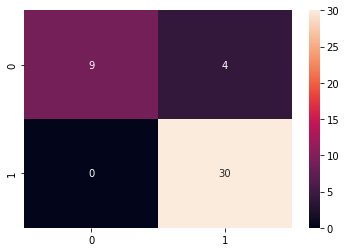

In [598]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot = True)

In [599]:
tp = 30
tn = 9
fn = 0
fp = 4

In [600]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9069767441860465

In [606]:
#threshold = 50
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.88      1.00      0.94        30

    accuracy                           0.91        43
   macro avg       0.94      0.85      0.88        43
weighted avg       0.92      0.91      0.90        43



In [607]:
#threshold = 60
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.91      1.00      0.95        30

    accuracy                           0.93        43
   macro avg       0.95      0.88      0.91        43
weighted avg       0.94      0.93      0.93        43



In [608]:
#threshold = 70
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.93      0.93      0.93        30

    accuracy                           0.91        43
   macro avg       0.89      0.89      0.89        43
weighted avg       0.91      0.91      0.91        43



In [609]:
##training accuracy
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        54
           1       0.90      0.93      0.92       118

    accuracy                           0.88       172
   macro avg       0.87      0.85      0.86       172
weighted avg       0.88      0.88      0.88       172



In [610]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.8461538461538461

In [616]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred1)

0.8897435897435897

In [617]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred2)

0.8846153846153846

In [621]:
fpr,tpr,threshold =metrics.roc_curve(Y_test,(classifier.predict_proba(X_test)[:,1]))

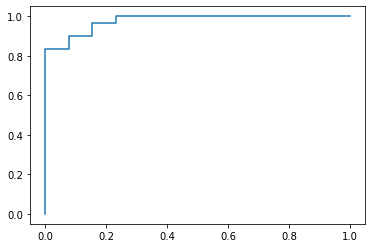

In [622]:
plt.plot(fpr,tpr)

In [604]:
y_pred1 = (classifier.predict_proba(X_test)[:,1] >=.7).astype(int)

In [605]:
y_pred2 = (classifier.predict_proba(X_test)[:,1] >=.6).astype(int)

In [56]:
tpr = tp/(tp+fn)

In [57]:
tpr

1.0

In [58]:
fpr = fp/(fp + tn)
fpr

0.3076923076923077

# Decesion Tree

In [439]:
data 

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN  

[215 rows x 15 columns]

In [60]:
x1 = data.drop(['status','salary'], axis= 1).values
y1 = data['status'].values

In [61]:
x1_train,x1_test,y1_train,y1_test =train_test_split(x1,y1, test_size = .2, random_state = 30)

In [62]:
x1_train.shape

(172, 12)

In [63]:
x1_test.shape

(43, 12)

In [382]:
 from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [65]:
dc.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [66]:
y1_pred = dc.predict(x1_test)

In [67]:
y1_train_pred = dc.predict(x1_train)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, y1_pred)

array([[10,  3],
       [ 2, 28]], dtype=int64)

In [69]:
## for testing data
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



In [70]:
## for training data
from sklearn.metrics import classification_report
print(classification_report(y1_train, y1_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00       118

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



In [325]:
from sklearn import tree

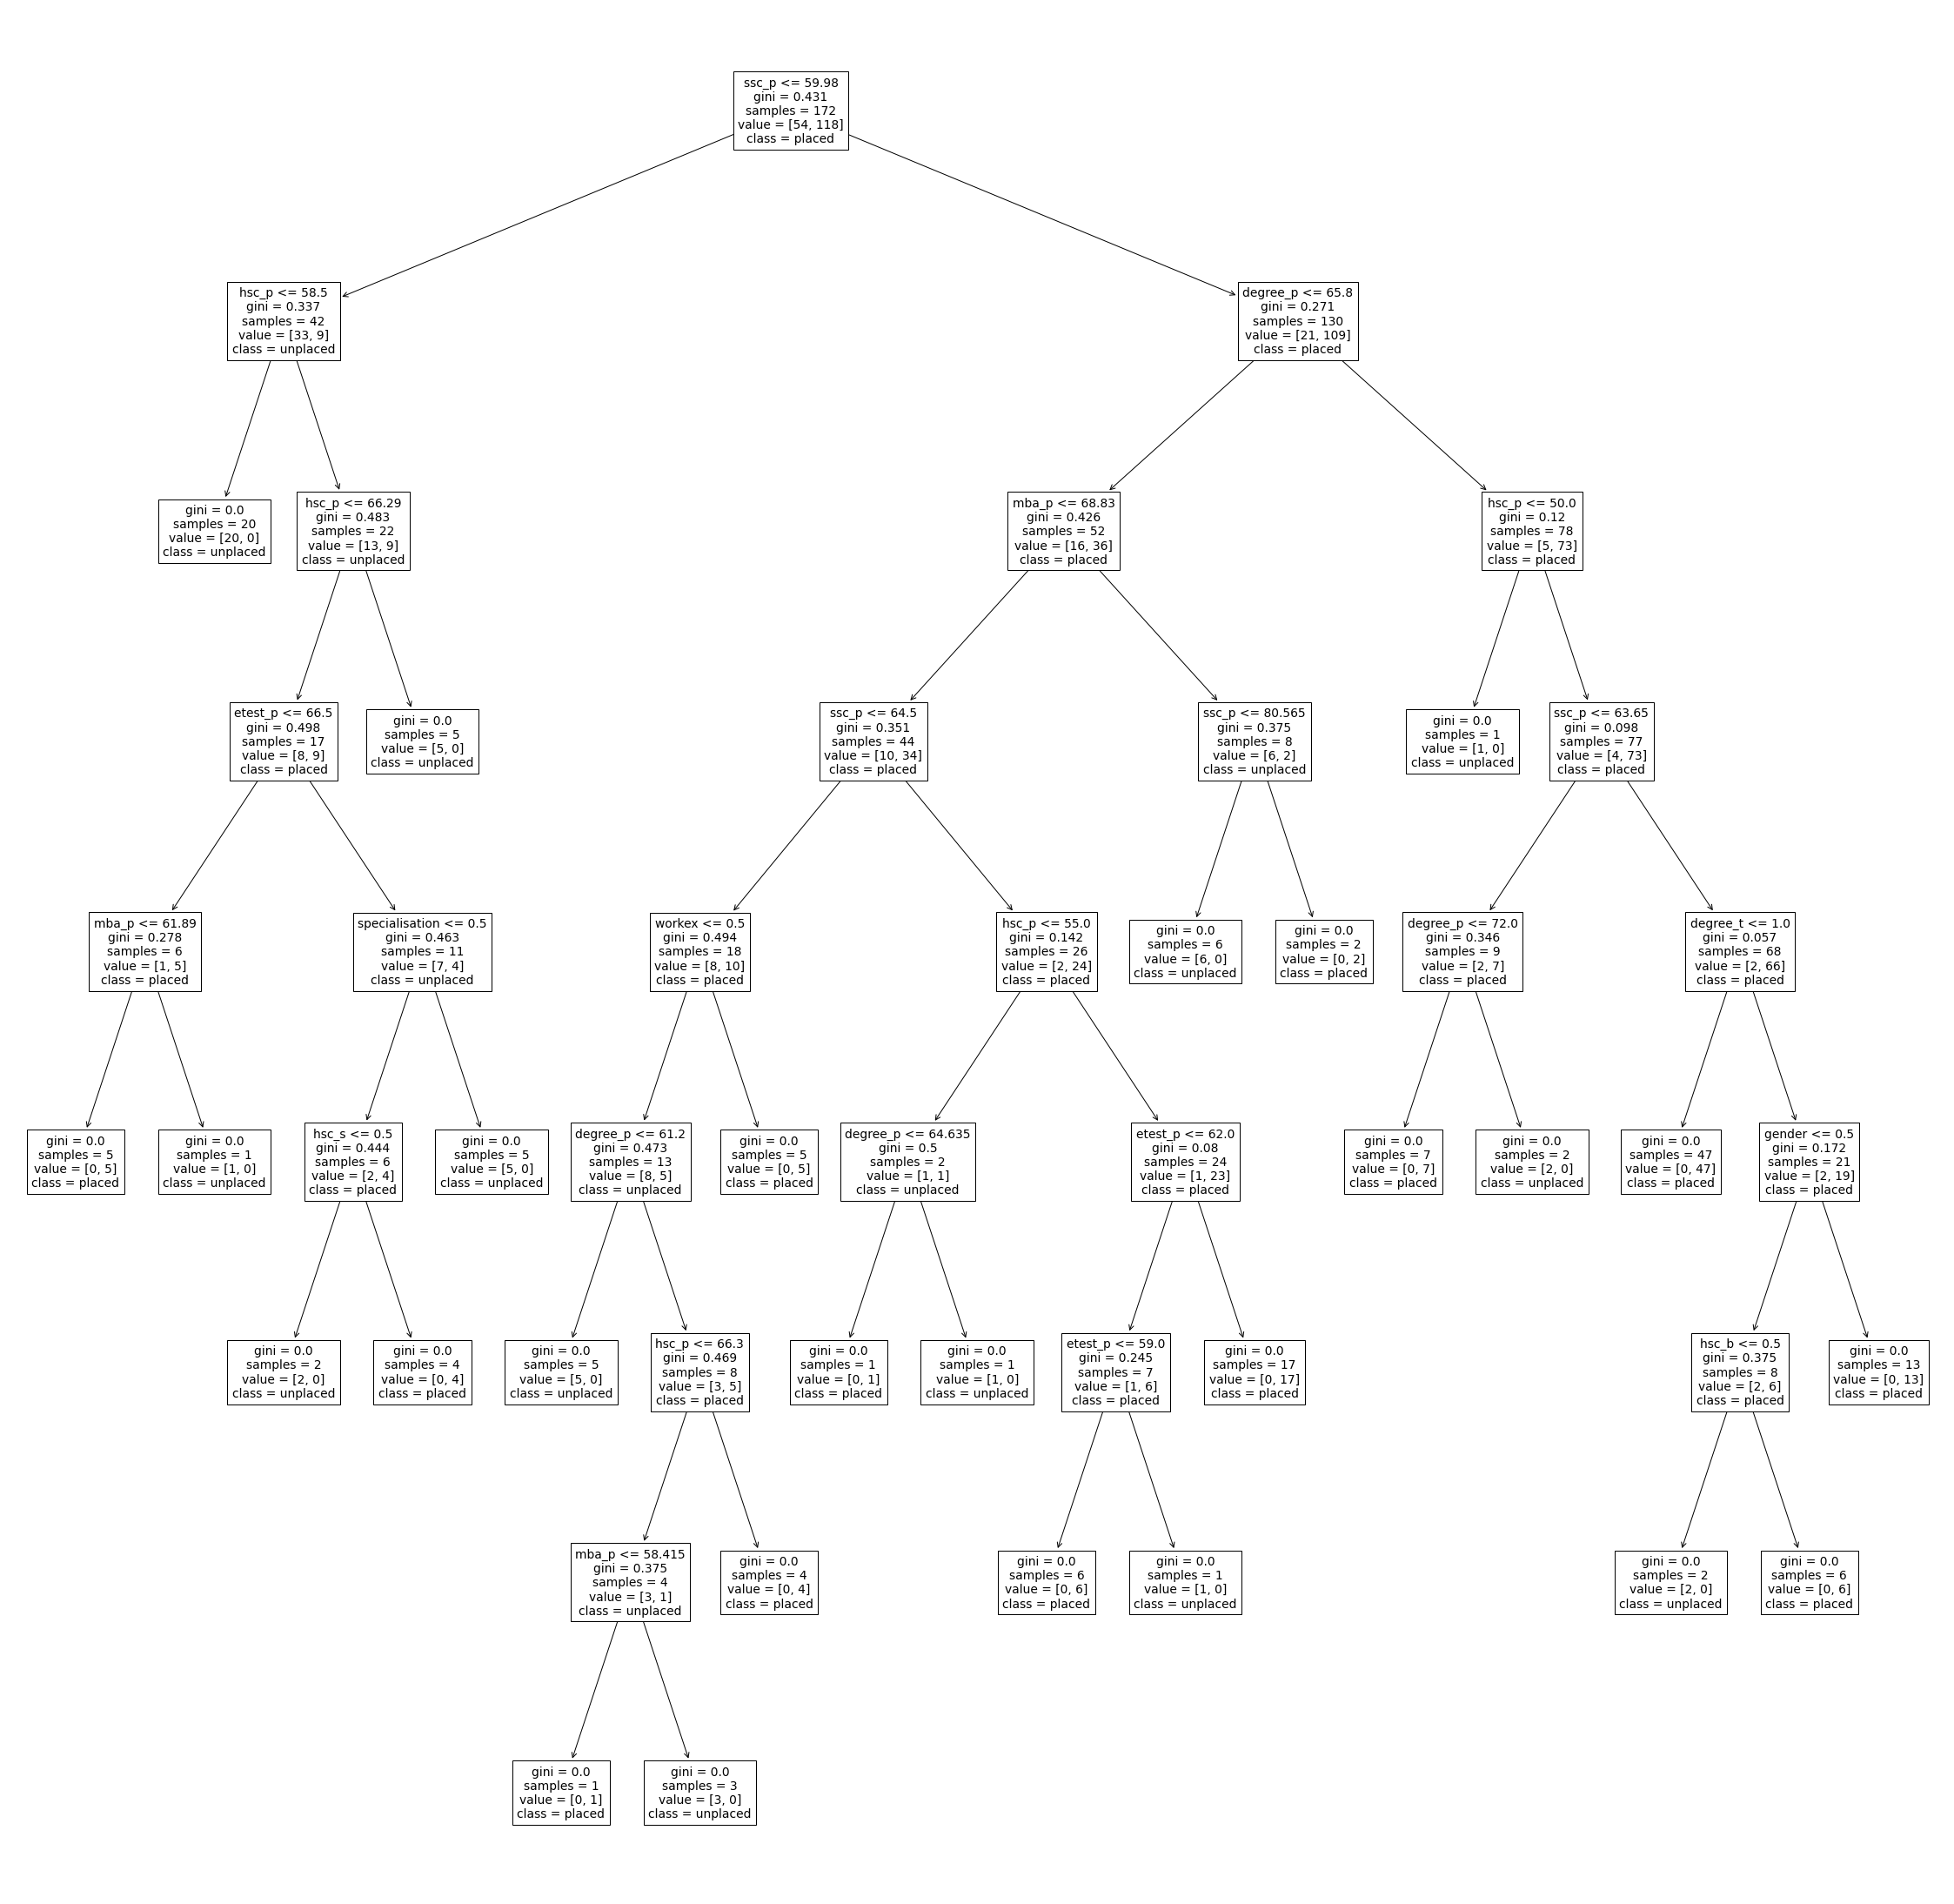

In [72]:
plt.figure(figsize =(40,40))
tree.plot_tree(dc,feature_names = data.columns[:-2],class_names = ['unplaced','placed'] )
plt.show()

In [73]:
data.head(1)

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0       1   67.0      1   91.0      1      1      58.0         2       0   

   etest_p  specialisation  mba_p  status    salary  
0     55.0               1   58.8       1  270000.0

# Random forest

In [74]:
n_estimators = [10,20,30,40,50,60,70,80,90,100,120,150]
max_features = ['sqrt','log2']
max_depth=np.linspace(10,120,10 ,dtype=int)
criterion = ['gini','entropy']
min_samples_split = np.linspace(2,20,2 ,dtype=int)

In [75]:
random_grid = {'n_estimators' :n_estimators,
               'max_features' :max_features,
               'max_depth' :max_depth,
               'criterion' :criterion,
               'min_samples_split' :min_samples_split}

In [76]:
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150],
 'max_features': ['sqrt', 'log2'],
 'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': array([ 2, 20])}

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfs = RandomForestClassifier()

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
rds = RandomizedSearchCV(estimator= rfs, param_distributions = random_grid, cv = 6, n_iter = 10, n_jobs = 1)

In [81]:
rds.fit(x1_train,y1_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': array([ 2, 20]),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 120,
                                                         150]})

In [82]:
rds.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 71,
 'criterion': 'entropy'}

In [83]:
rfbp = RandomForestClassifier(n_estimators= 20,min_samples_split= 2,max_features= 'log2',max_depth= 22,criterion= 'entropy')

In [84]:
rfbp

RandomForestClassifier(criterion='entropy', max_depth=22, max_features='log2',
                       n_estimators=20)

In [85]:
rfbp.fit(x1_train,y1_train)

RandomForestClassifier(criterion='entropy', max_depth=22, max_features='log2',
                       n_estimators=20)

In [86]:
y_rf_pred = rfbp.predict(x1_test)

In [87]:
print(classification_report(y1_test,y_rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.86      1.00      0.92        30

    accuracy                           0.88        43
   macro avg       0.93      0.81      0.84        43
weighted avg       0.90      0.88      0.87        43



# ------------------------------------------------------------------------------------------------------

# Evaluation 3 practicse

In [383]:
df = data8

In [384]:
df

age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

        campaign     pdays previous     poutcome  emp.var.rate cons.price.idx  \
0     Campaign-2  999-Days        0  nonexistent          -1.8         92.893   
1     Campaign-4  999-Days        0  nonexistent           1.1         93.994   
2     Campaign-1  999-Days        0  nonexistent           1.4         94.465   
3     Campaign-3  999-Days        0  nonexistent           1.4         94.465   
4     Campaign-1  999-Days        0  nonexistent          -0.1           93.2   
...          ...       ...      ...          ...           ...            ...   
4114  Campaign-1  999-Days        0  nonexistent           1.4         93.918   
4115  Campaign-1  999-Days        0  nonexistent           1.4         93.918   
4116  Campaign-2  999-Days        1      failure          -1.8         92.893   
4117  Campaign-1  999-Days        0  nonexistent           1.4         93.444   
4118  Campaign-1  999-Days        0  nonexistent          -0.1           93.2   

      cons.conf.idx pred_subs euribor3m nr.employed  
0             -46.2        no     1.313      5099.1  
1             -36.4        no     4.855        5191  
2             -41.8        no     4.962      5228.1  
3             -41.8        no     4.959      5228.1  
4             -42.0        no     4.191      5195.8  
...             ...       ...       ...         ...  
4114          -42.7        no     4.958      5228.1  
4115          -42.7        no     4.959      5228.1  
4116          -46.2        no     1.354      5099.1  
4117          -36.1        no     4.966      5228.1  
4118          -42.0        no      4.12      5195.8  

[4119 rows x 17 columns]

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4118 non-null   object 
 3   education       4118 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   campaign        4116 non-null   object 
 8   pdays           4119 non-null   object 
 9   previous        4119 non-null   object 
 10  poutcome        4117 non-null   object 
 11  emp.var.rate    4119 non-null   float64
 12  cons.price.idx  4119 non-null   object 
 13  cons.conf.idx   4119 non-null   float64
 14  pred_subs       4118 non-null   object 
 15  euribor3m       4119 non-null   object 
 16  nr.employed     4117 non-null   object 
dtypes: float64(2), int64(1), object(1

In [386]:
df.isnull().sum()

age               0
job               2
marital           1
education         1
default           0
housing           0
loan              0
campaign          3
pdays             0
previous          0
poutcome          2
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
pred_subs         1
euribor3m         0
nr.employed       2
dtype: int64

In [387]:
df.dropna(axis = 0, inplace = True)

In [388]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'pred_subs', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [389]:
df['age'].unique()

array([30, 39, 25, 38, 47, 32, 41, 35, 36, 29, 27, 44, 46, 50, 55, 40, 28,
       34, 33, 51, 48, 31, 20, 76, 45, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)

In [390]:
col = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'pred_subs', 'euribor3m',
       'nr.employed']
for i in col:
    print(df[i].unique())
    

[30 39 25 38 47 32 41 35 36 29 27 44 46 50 55 40 28 34 33 51 48 31 20 76
 45 56 24 58 60 37 52 42 49 54 59 57 43 53 75 82 71 21 22 23 26 81 61 67
 73 18 64 74 77 86 85 63 88 78 72 68 80 66 19 62 65 69 70]
['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
['married' 'single' 'divorced' 'unknown']
['basic.9y' 'high.school' 'university.degree' 'basic.6y' 'basic.4y'
 'professional.course' 'unknown' '"' '23%' 'illiterate']
['no' 'unknown' 'yes']
['yes' 'no' 'unknown' '$' 'Appolo']
['no' 'unknown' 'yes' '$%' '$' '&']
['Campaign-2' 'Campaign-4' 'Campaign-1' 'Campaign-3' 'Campaign-6'
 'Campaign-7' 'Campaign-27' 'Campaign-5' 'Campaign-12' 'Campaign-14'
 'Campaign-10' 'Campaign-11' 'Campaign-13' 'Campaign-8' 'Campaign-9'
 'Campaign-15' 'Campaign-16' 'Campaign-18' 'Campaign-17' 'Campaign-22'
 'Campaign-19' 'Campaign-23' 'Campaign-24' 'Campaign-35' 'Campaign-29']
['999-Days' '12-Days' '3-Days' '6-Da

In [391]:
df['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [392]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [393]:
df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree', 'basic.6y',
       'basic.4y', 'professional.course', 'unknown', '"', '23%',
       'illiterate'], dtype=object)

In [394]:
df[df['education'] =='23%']

age       job  marital education default housing loan    campaign  \
356   27  services  married       23%      no      no   no  Campaign-3   

        pdays previous     poutcome  emp.var.rate cons.price.idx  \
356  999-Days        0  nonexistent           1.4         93.918   

     cons.conf.idx pred_subs euribor3m nr.employed  
356          -42.7        no     4.963      5228.1

In [396]:
df.drop([58], axis = 0, inplace = True)

In [397]:
df.drop([356], axis = 0, inplace = True)

In [398]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
de = df[df['default'] == 'unknown'].index

In [ ]:
df.drop(de, axis = 0, inplace = True)

In [399]:
df.shape

(4106, 17)

In [403]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [401]:
df[df['housing'] == 'Appolo']

age         job marital            education default housing loan  \
1688   34  technician  single  professional.course      no  Appolo  yes   

        campaign     pdays previous     poutcome  emp.var.rate cons.price.idx  \
1688  Campaign-1  999-Days        0  nonexistent           1.4         93.444   

      cons.conf.idx pred_subs euribor3m nr.employed  
1688          -36.1        no      4.97      5228.1

In [402]:
df.drop([597], axis = 0, inplace = True)
df.drop([756], axis = 0, inplace = True)
df.drop([883], axis = 0, inplace = True)
df.drop([1688], axis = 0, inplace = True)


In [404]:
df['loan'].unique()

array(['no', 'unknown', 'yes', '$%', '$', '&'], dtype=object)

In [405]:
df[df['loan'] == '&']

age      job  marital          education default housing loan  \
672   59  retired  married  university.degree      no     yes    &   

        campaign     pdays previous     poutcome  emp.var.rate cons.price.idx  \
672  Campaign-18  999-Days        0  nonexistent           1.4         93.444   

     cons.conf.idx pred_subs euribor3m nr.employed  
672          -36.1        no     4.962      5228.1

In [406]:
df.drop([173], axis = 0, inplace = True)
df.drop([510], axis = 0, inplace = True)
df.drop([961], axis = 0, inplace = True)
df.drop([672], axis = 0, inplace = True)


In [407]:
df['campaign'].unique()

array(['Campaign-2', 'Campaign-4', 'Campaign-1', 'Campaign-3',
       'Campaign-6', 'Campaign-7', 'Campaign-27', 'Campaign-5',
       'Campaign-12', 'Campaign-14', 'Campaign-10', 'Campaign-11',
       'Campaign-13', 'Campaign-8', 'Campaign-9', 'Campaign-15',
       'Campaign-16', 'Campaign-17', 'Campaign-22', 'Campaign-19',
       'Campaign-23', 'Campaign-24', 'Campaign-35', 'Campaign-29'],
      dtype=object)

In [408]:
def campaign(a):
    return int(a.split('-')[1])

In [409]:
df['campaign'] = df['campaign'].apply(lambda a: campaign(a))

In [410]:
df['campaign'].unique()

array([ 2,  4,  1,  3,  6,  7, 27,  5, 12, 14, 10, 11, 13,  8,  9, 15, 16,
       17, 22, 19, 23, 24, 35, 29], dtype=int64)

In [411]:
df['pdays'].unique()

array(['999-Days', '12-Days', '3-Days', '6-Days', '5-Days', '2-Days',
       '@-Days', '10-Days', '11-Days', '7-Days', '1-Days', '18-Days',
       '4-Days', '15-Days', '0-Days', 'Bank No responce-Days', '16-Days',
       '9-Days', '19-Days', '17-Days', '13-Days', '21-Days', '14-Days'],
      dtype=object)

In [412]:
df[df['pdays'] == 'Bank No responce-Days']

age     job   marital    education default housing loan  campaign  \
1546   46  admin.  divorced  high.school      no     yes   no         1   

                      pdays previous     poutcome  emp.var.rate  \
1546  Bank No responce-Days        0  nonexistent          -0.1   

     cons.price.idx  cons.conf.idx pred_subs euribor3m nr.employed  
1546         93.798          -40.4        no     5.045      5195.8

In [413]:
df.drop([116], axis = 0, inplace = True)
df.drop([1546], axis = 0, inplace = True)

In [414]:
def pdays(b):
    return int(b.split('-')[0])

In [415]:
df['pdays'] = df['pdays'].apply(lambda b: pdays(b))

In [416]:
df['pdays'].unique()

array([999,  12,   3,   6,   5,   2,  10,  11,   7,   1,  18,   4,  15,
         0,  16,   9,  19,  17,  13,  21,  14], dtype=int64)

In [417]:
df['previous'].unique()

array(['0', '2', '1', '3', '5', '4', '6', '\\'], dtype=object)

In [418]:
df[df['previous'] == '\\']

age          job  marital education default housing loan  campaign  \
1126   34  blue-collar  married  basic.4y      no     yes   no         1   

      pdays previous     poutcome  emp.var.rate cons.price.idx  cons.conf.idx  \
1126    999        \  nonexistent           1.4         93.918          -42.7   

     pred_subs euribor3m nr.employed  
1126        no     4.958      5228.1

In [419]:
df.drop([1126], axis = 0, inplace = True)

In [427]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [425]:
df[df['poutcome'] == 'Q998']

age            job marital          education default housing loan  \
994   35  self-employed  single  university.degree      no      no  yes   

     campaign  pdays previous poutcome  emp.var.rate cons.price.idx  \
994         1      3        1     Q998          -0.1           93.2   

     cons.conf.idx pred_subs euribor3m nr.employed  
994          -42.0        no      4.12      5195.8

In [426]:
df.drop([147], axis = 0, inplace = True)
df.drop([213], axis = 0, inplace = True)
df.drop([311], axis = 0, inplace = True)
df.drop([962], axis = 0, inplace = True)
df.drop([994], axis = 0, inplace = True)


In [499]:
df['emp.var.rate'].unique()

array([-1.8,  1.1,  1.4, -0.1, -1.1, -2.9, -1.7, -3.4, -3. , -0.2])

In [507]:
df['cons.price.idx'].unique()

array(['92.893', '93.994', '94.465', '93.2', '94.199', '93.918', '93.369',
       '93.444', '92.843', '92.963', '94.601', '94.027', '92.379',
       '92.431', '93.749', '93.075', '94.055', '92.469', '94.767',
       '92.201', '92.649', '94.215', '93.876', '93.798', '92.713',
       '92.756'], dtype=object)

In [505]:
df[df['cons.price.idx'] == 'xccui']

age         job marital            education default housing loan  \
1911   47  technician  single  professional.course      no     yes   no   

      campaign  pdays previous     poutcome  emp.var.rate cons.price.idx  \
1911         2    999        0  nonexistent           1.4          xccui   

      cons.conf.idx pred_subs euribor3m nr.employed  
1911          -42.7        no     4.962      5228.1

In [506]:
df.drop([260], axis = 0, inplace= True)
df.drop([338], axis = 0, inplace= True)
df.drop([509], axis = 0, inplace= True)
df.drop([1911], axis = 0, inplace= True)

In [508]:
df['cons.conf.idx'].unique()

array([-46.2, -36.4, -41.8, -42. , -37.5, -42.7, -34.8, -36.1, -50. ,
       -40.8, -49.5, -38.3, -29.8, -26.9, -34.6, -47.1, -39.8, -33.6,
       -50.8, -31.4, -30.1, -40.3, -40. , -40.4, -33. , -45.9])

In [509]:
df['pred_subs'].unique()

array(['no', 'yes'], dtype=object)

In [510]:
df['euribor3m'].unique()

array(['1.313', '4.855', '4.962', '4.959', '4.191', '0.884', '0.879',
       '4.958', '4.968', '4.859', '4.963', '4.957', '4.961', '0.639',
       '4.967', '4.965', '4.864', '4.856', '1.299', '4.86', '1.687',
       '4.865', '1.268', '4.12', '1.334', '0.977', '1.344', '0.899',
       '1.327', '4.592', '4.97', '1.26', '4.966', '0.77', '4.866',
       '4.964', '0.886', '0.739', '0.654', '1.405', '1.281', '4.96',
       '0.754', '1.291', '1.365', '4.076', '4.857', '4.153', '1.266',
       '1.41', '1.25', '4.858', '0.702', '1.029', '1.085', '1.392',
       '1.262', '1.05', '0.851', '0.716', '0.877', '0.835', '1.048',
       '0.904', '1.028', '0.637', '1.244', '1.354', '4.021', '1.453',
       '0.715', '1.778', '0.773', '1.035', '0.9', '0.898', '0.742',
       '0.861', '1.264', '0.704', '1.27', '0.695', '1.039', '1.531',
       '0.883', '0.748', '0.809', '4.794', '1.479', '0.697', '0.959',
       '1.032', '0.896', '0.827', '1.483', '0.905', '1.466', '0.714',
       '0.644', '0.849', '0.881'

In [522]:
df[df['euribor3m'] == 'hgz']

age         job marital    education default housing loan  campaign  \
1908   37  technician  single  high.school      no      no   no         3   

      pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
1908    999       0.0  nonexistent           1.4          94.465   

      cons.conf.idx pred_subs euribor3m nr.employed  
1908          -41.8        no       hgz      5228.1

In [523]:
df.drop([1908], axis = 0, inplace = True)

In [515]:
df['nr.employed'].unique()

array(['5099.1', '5191', '5228.1', '5195.8', '4963.6', '5008.7', '5076.2',
       '4991.6', '5017.5', '5023.5', '5176.3'], dtype=object)

In [513]:
df[df['nr.employed'] == 'Bank']

age      job  marital education  default housing loan  campaign  pdays  \
1219   48  retired  married  basic.4y  unknown     yes  yes        17    999   

     previous     poutcome  emp.var.rate cons.price.idx  cons.conf.idx  \
1219        0  nonexistent           1.4         93.918          -42.7   

     pred_subs euribor3m nr.employed  
1219        no     4.962        Bank

In [514]:
df.drop([312], axis = 0, inplace = True)
df.drop([1219], axis = 0, inplace = True)


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4083 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4083 non-null   int64  
 1   job             4083 non-null   object 
 2   marital         4083 non-null   object 
 3   education       4083 non-null   object 
 4   default         4083 non-null   object 
 5   housing         4083 non-null   object 
 6   loan            4083 non-null   object 
 7   campaign        4083 non-null   int64  
 8   pdays           4083 non-null   int64  
 9   previous        4083 non-null   float64
 10  poutcome        4083 non-null   object 
 11  emp.var.rate    4083 non-null   float64
 12  cons.price.idx  4083 non-null   float64
 13  cons.conf.idx   4083 non-null   float64
 14  pred_subs       4083 non-null   object 
 15  euribor3m       4083 non-null   float64
 16  nr.employed     4083 non-null   float64
dtypes: float64(6), int64(3), object(8

In [528]:
df

age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

      campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0            2    999       0.0  nonexistent          -1.8          92.893   
1            4    999       0.0  nonexistent           1.1          93.994   
2            1    999       0.0  nonexistent           1.4          94.465   
3            3    999       0.0  nonexistent           1.4          94.465   
4            1    999       0.0  nonexistent          -0.1          93.200   
...        ...    ...       ...          ...           ...             ...   
4114         1    999       0.0  nonexistent           1.4          93.918   
4115         1    999       0.0  nonexistent           1.4          93.918   
4116         2    999       1.0      failure          -1.8          92.893   
4117         1    999       0.0  nonexistent           1.4          93.444   
4118         1    999       0.0  nonexistent          -0.1          93.200   

      cons.conf.idx pred_subs  euribor3m  nr.employed  
0             -46.2        no      1.313       5099.1  
1             -36.4        no      4.855       5191.0  
2             -41.8        no      4.962       5228.1  
3             -41.8        no      4.959       5228.1  
4             -42.0        no      4.191       5195.8  
...             ...       ...        ...          ...  
4114          -42.7        no      4.958       5228.1  
4115          -42.7        no      4.959       5228.1  
4116          -46.2        no      1.354       5099.1  
4117          -36.1        no      4.966       5228.1  
4118          -42.0        no      4.120       5195.8  

[4083 rows x 17 columns]

In [518]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'pred_subs', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [524]:
col = ['previous','cons.price.idx', 'cons.conf.idx','euribor3m','nr.employed']
for i in col:
    df[i] = df[i].astype(float)

In [530]:
le = LabelEncoder()

In [531]:
df['pred_subs'] =le.fit_transform(df['pred_subs']  )

In [533]:
df.head(5)

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         2    999       0.0  nonexistent          -1.8          92.893   
1         4    999       0.0  nonexistent           1.1          93.994   
2         1    999       0.0  nonexistent           1.4          94.465   
3         3    999       0.0  nonexistent           1.4          94.465   
4         1    999       0.0  nonexistent          -0.1          93.200   

   cons.conf.idx  pred_subs  euribor3m  nr.employed  
0          -46.2          0      1.313       5099.1  
1          -36.4          0      4.855       5191.0  
2          -41.8          0      4.962       5228.1  
3          -41.8          0      4.959       5228.1  
4          -42.0          0      4.191       5195.8

In [534]:
df.corr()

age  campaign     pdays  previous  emp.var.rate  \
age             1.000000 -0.018085 -0.044887  0.052695     -0.019665   
campaign       -0.018085  1.000000  0.058252 -0.091386      0.175893   
pdays          -0.044887  0.058252  1.000000 -0.588844      0.271505   
previous        0.052695 -0.091386 -0.588844  1.000000     -0.414276   
emp.var.rate   -0.019665  0.175893  0.271505 -0.414276      1.000000   
cons.price.idx -0.000118  0.144942  0.057670 -0.163059      0.754920   
cons.conf.idx   0.099120  0.006674 -0.093046 -0.049619      0.193041   
pred_subs       0.059238 -0.076726 -0.334045  0.257057     -0.283277   
euribor3m      -0.015222  0.159526  0.302980 -0.458270      0.970347   
nr.employed    -0.042536  0.161199  0.383830 -0.514786      0.896982   

                cons.price.idx  cons.conf.idx  pred_subs  euribor3m  \
age                  -0.000118       0.099120   0.059238  -0.015222   
campaign              0.144942       0.006674  -0.076726   0.159526   
pdays                 0.057670      -0.093046  -0.334045   0.302980   
previous             -0.163059      -0.049619   0.257057  -0.458270   
emp.var.rate          0.754920       0.193041  -0.283277   0.970347   
cons.price.idx        1.000000       0.043895  -0.097814   0.656544   
cons.conf.idx         0.043895       1.000000   0.056006   0.274927   
pred_subs            -0.097814       0.056006   1.000000  -0.298501   
euribor3m             0.656544       0.274927  -0.298501   1.000000   
nr.employed           0.471676       0.105747  -0.349558   0.942588   

                nr.employed  
age               -0.042536  
campaign           0.161199  
pdays              0.383830  
previous          -0.514786  
emp.var.rate       0.896982  
cons.price.idx     0.471676  
cons.conf.idx      0.105747  
pred_subs         -0.349558  
euribor3m          0.942588  
nr.employed        1.000000

In [570]:
new_df = df.drop(['age','campaign','cons.price.idx','cons.conf.idx','education','job','poutcome'], axis = 1)

In [571]:
new_df.columns

Index(['marital', 'default', 'housing', 'loan', 'pdays', 'previous',
       'emp.var.rate', 'pred_subs', 'euribor3m', 'nr.employed'],
      dtype='object')

In [572]:
new_df.head(4)

marital default  housing     loan  pdays  previous  emp.var.rate  \
0  married      no      yes       no    999       0.0          -1.8   
1   single      no       no       no    999       0.0           1.1   
2  married      no      yes       no    999       0.0           1.4   
3  married      no  unknown  unknown    999       0.0           1.4   

   pred_subs  euribor3m  nr.employed  
0          0      1.313       5099.1  
1          0      4.855       5191.0  
2          0      4.962       5228.1  
3          0      4.959       5228.1

In [556]:
from sklearn.preprocessing import OneHotEncoder

In [565]:
ohe = OneHotEncoder(sparse=False)

In [574]:
asd = pd.get_dummies(new_df)

In [577]:
asd

pdays  previous  emp.var.rate  pred_subs  euribor3m  nr.employed  \
0       999       0.0          -1.8          0      1.313       5099.1   
1       999       0.0           1.1          0      4.855       5191.0   
2       999       0.0           1.4          0      4.962       5228.1   
3       999       0.0           1.4          0      4.959       5228.1   
4       999       0.0          -0.1          0      4.191       5195.8   
...     ...       ...           ...        ...        ...          ...   
4114    999       0.0           1.4          0      4.958       5228.1   
4115    999       0.0           1.4          0      4.959       5228.1   
4116    999       1.0          -1.8          0      1.354       5099.1   
4117    999       0.0           1.4          0      4.966       5228.1   
4118    999       0.0          -0.1          0      4.120       5195.8   

      marital_divorced  marital_married  marital_single  marital_unknown  \
0                    0                1               0                0   
1                    0                0               1                0   
2                    0                1               0                0   
3                    0                1               0                0   
4                    0                1               0                0   
...                ...              ...             ...              ...   
4114                 0                1               0                0   
4115                 0                1               0                0   
4116                 0                0               1                0   
4117                 0                1               0                0   
4118                 0                0               1                0   

      default_no  default_unknown  default_yes  housing_no  housing_unknown  \
0              1                0            0           0                0   
1              1                0            0           1                0   
2              1                0            0           0                0   
3              1                0            0           0                1   
4              1                0            0           0                0   
...          ...              ...          ...         ...              ...   
4114           1                0            0           0                0   
4115           1                0            0           0                0   
4116           1                0            0           1                0   
4117           1                0            0           1                0   
4118           1                0            0           0                0   

      housing_yes  loan_no  loan_unknown  loan_yes  
0               1        1             0         0  
1               0        1             0         0  
2               1        1             0         0  
3               0        0             1         0  
4               1        1             0         0  
...           ...      ...           ...       ...  
4114            1        0             0         1  
4115            1        1             0         0  
4116            0        1             0         0  
4117            0        1             0         0  
4118            1        1             0         0  

[4083 rows x 19 columns]

In [582]:
X1 = asd.drop('pred_subs', axis = 1).values
Y1 = asd

In [583]:
X1

array([[ 9.99e+02,  0.00e+00, -1.80e+00, ...,  1.00e+00,  0.00e+00,
         0.00e+00],
       [ 9.99e+02,  0.00e+00,  1.10e+00, ...,  1.00e+00,  0.00e+00,
         0.00e+00],
       [ 9.99e+02,  0.00e+00,  1.40e+00, ...,  1.00e+00,  0.00e+00,
         0.00e+00],
       ...,
       [ 9.99e+02,  1.00e+00, -1.80e+00, ...,  1.00e+00,  0.00e+00,
         0.00e+00],
       [ 9.99e+02,  0.00e+00,  1.40e+00, ...,  1.00e+00,  0.00e+00,
         0.00e+00],
       [ 9.99e+02,  0.00e+00, -1.00e-01, ...,  1.00e+00,  0.00e+00,
         0.00e+00]])

## Clustering : putting same data values in group

In [471]:
data

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      1  91.00      1      1     58.00         2       0   
1         1  79.33      0  78.33      1      2     77.48         2       1   
2         1  65.00      0  68.00      0      0     64.00         0       0   
3         1  56.00      0  52.00      0      2     52.00         2       0   
4         1  85.80      0  73.60      0      1     73.30         0       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      1  82.00      1      1     77.60         0       0   
211       1  58.00      1  60.00      1      2     72.00         2       0   
212       1  67.00      1  67.00      1      1     73.00         0       1   
213       0  74.00      1  66.00      1      1     58.00         0       0   
214       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  status    salary  
0       55.0               1  58.80       1  270000.0  
1       86.5               0  66.28       1  200000.0  
2       75.0               0  57.80       1  250000.0  
3       66.0               1  59.43       0  265000.0  
4       96.8               0  55.50       1  425000.0  
..       ...             ...    ...     ...       ...  
210     91.0               0  74.49       1  400000.0  
211     74.0               0  53.62       1  275000.0  
212     59.0               0  69.72       1  295000.0  
213     70.0               1  60.23       1  204000.0  
214     89.0               1  60.22       0  265000.0  

[215 rows x 14 columns]

In [472]:
n_data = data

In [473]:
s_data = data #for scaling

In [474]:
n_data

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      1  91.00      1      1     58.00         2       0   
1         1  79.33      0  78.33      1      2     77.48         2       1   
2         1  65.00      0  68.00      0      0     64.00         0       0   
3         1  56.00      0  52.00      0      2     52.00         2       0   
4         1  85.80      0  73.60      0      1     73.30         0       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      1  82.00      1      1     77.60         0       0   
211       1  58.00      1  60.00      1      2     72.00         2       0   
212       1  67.00      1  67.00      1      1     73.00         0       1   
213       0  74.00      1  66.00      1      1     58.00         0       0   
214       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  status    salary  
0       55.0               1  58.80       1  270000.0  
1       86.5               0  66.28       1  200000.0  
2       75.0               0  57.80       1  250000.0  
3       66.0               1  59.43       0  265000.0  
4       96.8               0  55.50       1  425000.0  
..       ...             ...    ...     ...       ...  
210     91.0               0  74.49       1  400000.0  
211     74.0               0  53.62       1  275000.0  
212     59.0               0  69.72       1  295000.0  
213     70.0               1  60.23       1  204000.0  
214     89.0               1  60.22       0  265000.0  

[215 rows x 14 columns]

In [475]:
ss = StandardScaler()

In [476]:
s_data = ss.fit_transform(s_data)

In [477]:
s_data

array([[ 0.73943397, -0.02808697,  1.08245885, ..., -0.59764672,
         0.67283185, -0.14456974],
       [ 0.73943397,  1.11336869, -0.92382264, ...,  0.6876202 ,
         0.67283185, -1.04142657],
       [ 0.73943397, -0.21323793, -0.92382264, ..., -0.76947385,
         0.67283185, -0.40081455],
       ...,
       [ 0.73943397, -0.02808697,  1.08245885, ...,  1.27870553,
         0.67283185,  0.17573626],
       [-1.35238581,  0.61994138,  1.08245885, ..., -0.35193393,
         0.67283185, -0.99017761],
       [ 0.73943397, -0.49096436, -0.92382264, ..., -0.3536522 ,
        -1.48625544, -0.20863095]])

In [478]:
from sklearn.cluster import KMeans

In [479]:
kmeans = KMeans(4)

In [480]:
kMeans = KMeans(3) #for scaling

In [481]:
kmeans.fit(n_data)

KMeans(n_clusters=4)

In [482]:
kMeans.fit(s_data)

KMeans(n_clusters=3)

In [483]:
kmeans.predict(n_data)

array([1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2,
       2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 3, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 3, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1])

In [484]:
kMeans.predict(s_data)

array([1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2,
       1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0,
       1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2,
       1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0,
       2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 2])

In [485]:
n_data['cluster'] = kmeans.predict(n_data)

In [486]:
n_data

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      1  91.00      1      1     58.00         2       0   
1         1  79.33      0  78.33      1      2     77.48         2       1   
2         1  65.00      0  68.00      0      0     64.00         0       0   
3         1  56.00      0  52.00      0      2     52.00         2       0   
4         1  85.80      0  73.60      0      1     73.30         0       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      1  82.00      1      1     77.60         0       0   
211       1  58.00      1  60.00      1      2     72.00         2       0   
212       1  67.00      1  67.00      1      1     73.00         0       1   
213       0  74.00      1  66.00      1      1     58.00         0       0   
214       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  status    salary  cluster  
0       55.0               1  58.80       1  270000.0        1  
1       86.5               0  66.28       1  200000.0        0  
2       75.0               0  57.80       1  250000.0        1  
3       66.0               1  59.43       0  265000.0        1  
4       96.8               0  55.50       1  425000.0        2  
..       ...             ...    ...     ...       ...      ...  
210     91.0               0  74.49       1  400000.0        2  
211     74.0               0  53.62       1  275000.0        1  
212     59.0               0  69.72       1  295000.0        1  
213     70.0               1  60.23       1  204000.0        0  
214     89.0               1  60.22       0  265000.0        1  

[215 rows x 15 columns]

In [487]:
n_data['cluster'].value_counts()

1    144
0     44
2     24
3      3
Name: cluster, dtype: int64

In [488]:
nn_data = n_data.drop('cluster', axis = 1)

In [489]:
nn_data

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      1  91.00      1      1     58.00         2       0   
1         1  79.33      0  78.33      1      2     77.48         2       1   
2         1  65.00      0  68.00      0      0     64.00         0       0   
3         1  56.00      0  52.00      0      2     52.00         2       0   
4         1  85.80      0  73.60      0      1     73.30         0       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      1  82.00      1      1     77.60         0       0   
211       1  58.00      1  60.00      1      2     72.00         2       0   
212       1  67.00      1  67.00      1      1     73.00         0       1   
213       0  74.00      1  66.00      1      1     58.00         0       0   
214       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  status    salary  
0       55.0               1  58.80       1  270000.0  
1       86.5               0  66.28       1  200000.0  
2       75.0               0  57.80       1  250000.0  
3       66.0               1  59.43       0  265000.0  
4       96.8               0  55.50       1  425000.0  
..       ...             ...    ...     ...       ...  
210     91.0               0  74.49       1  400000.0  
211     74.0               0  53.62       1  275000.0  
212     59.0               0  69.72       1  295000.0  
213     70.0               1  60.23       1  204000.0  
214     89.0               1  60.22       0  265000.0  

[215 rows x 14 columns]

In [490]:
kmeans.inertia_

152184493200.97626

In [491]:
kMeans.inertia_

2293.2016082382106

In [492]:
inertia = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(nn_data)
    inertia.append(kmeans.inertia_)
    print(inertia)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1309749800655.213]
[1309749800655.213, 548116571376.5885]
[1309749800655.213, 548116571376.5885, 223666637681.11658]
[1309749800655.213, 548116571376.5885, 223666637681.11658, 152184493200.97626]
[1309749800655.213, 548116571376.5885, 223666637681.11658, 152184493200.97626, 103584492975.98174]
[1309749800655.213, 548116571376.5885, 223666637681.11658, 152184493200.97626, 103584492975.98174, 61957617573.15202]
[1309749800655.213, 548116571376.5885, 223666637681.11658, 152184493200.97626, 103584492975.98174, 61957617573.15202, 33341279007.264313]
[1309749800655.213, 548116571376.5885, 223666637681.11658, 152184493200.97626, 103584492975.98174, 61957617573.15202, 33341279007.264313, 21231602066.1696]
[1309749800655.213, 548116571376.5885, 223666637681.11658, 152184493200.97626, 103584492975.98174, 61957617573.15202, 33341279007.264313, 21231602066.1696, 10823258935.707691]


In [493]:
inertia

[1309749800655.213,
 548116571376.5885,
 223666637681.11658,
 152184493200.97626,
 103584492975.98174,
 61957617573.15202,
 33341279007.264313,
 21231602066.1696,
 10823258935.707691]

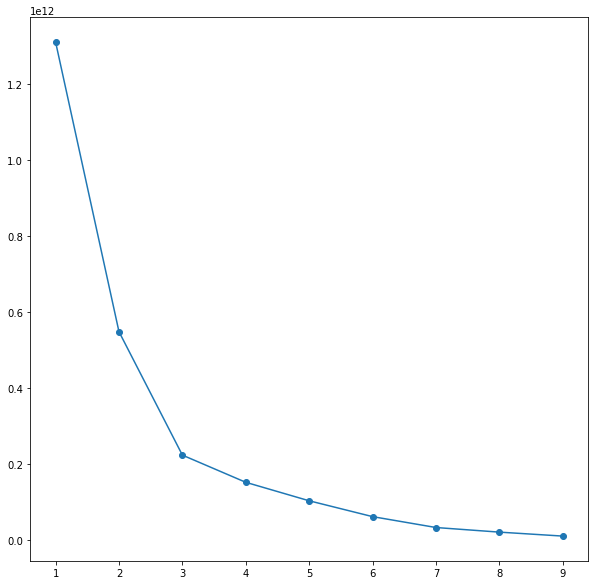

In [494]:
plt.figure(figsize=(10,10))
plt.plot(range(1,10), inertia, marker = 'o')
plt.show()

In [495]:
inertia_scal = []
for j in range(1,10):
    kMeans = KMeans(j)
    kMeans.fit(s_data)
    inertia_scal.append(kMeans.inertia_)
    print(inertia_scal)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3010.0]
[3010.0, 2545.184699118313]
[3010.0, 2545.184699118313, 2293.262593874392]
[3010.0, 2545.184699118313, 2293.262593874392, 2151.055617914399]
[3010.0, 2545.184699118313, 2293.262593874392, 2151.055617914399, 1991.649956967917]
[3010.0, 2545.184699118313, 2293.262593874392, 2151.055617914399, 1991.649956967917, 1894.1636480961233]
[3010.0, 2545.184699118313, 2293.262593874392, 2151.055617914399, 1991.649956967917, 1894.1636480961233, 1814.2641555559624]
[3010.0, 2545.184699118313, 2293.262593874392, 2151.055617914399, 1991.649956967917, 1894.1636480961233, 1814.2641555559624, 1723.80363903635]
[3010.0, 2545.184699118313, 2293.262593874392, 2151.055617914399, 1991.649956967917, 1894.1636480961233, 1814.2641555559624, 1723.80363903635, 1661.1381879241935]


In [496]:
inertia_scal

[3010.0,
 2545.184699118313,
 2293.262593874392,
 2151.055617914399,
 1991.649956967917,
 1894.1636480961233,
 1814.2641555559624,
 1723.80363903635,
 1661.1381879241935]

Text(0, 0.5, 'Inertia')

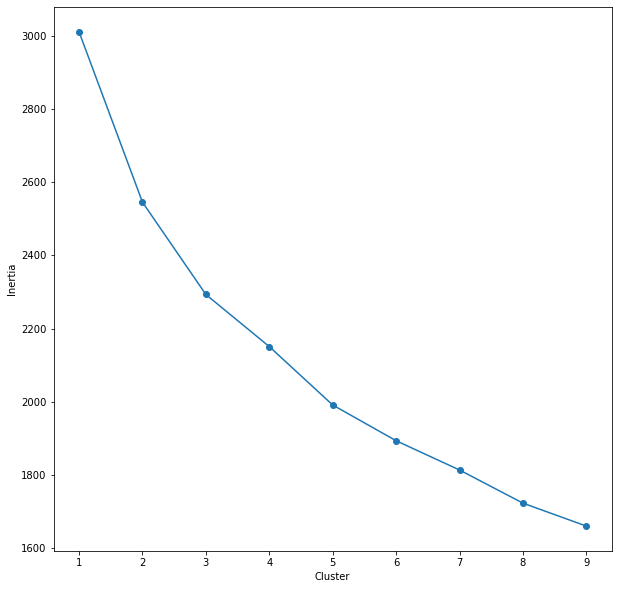

In [497]:
plt.figure(figsize = (10,10))
plt.plot(range(1,10),inertia_scal,marker = 'o')
plt.xlabel('Cluster')
plt.ylabel('Inertia')

after scaling optimal clusters can be 5

## hierichal clustering

In [498]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agc = AgglomerativeClustering(4)

## PCA

In [623]:
data

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  67.00      1  91.00      1      1     58.00         2       0   
1         1  79.33      0  78.33      1      2     77.48         2       1   
2         1  65.00      0  68.00      0      0     64.00         0       0   
3         1  56.00      0  52.00      0      2     52.00         2       0   
4         1  85.80      0  73.60      0      1     73.30         0       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       1  80.60      1  82.00      1      1     77.60         0       0   
211       1  58.00      1  60.00      1      2     72.00         2       0   
212       1  67.00      1  67.00      1      1     73.00         0       1   
213       0  74.00      1  66.00      1      1     58.00         0       0   
214       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  status    salary  cluster  
0       55.0               1  58.80       1  270000.0        1  
1       86.5               0  66.28       1  200000.0        0  
2       75.0               0  57.80       1  250000.0        1  
3       66.0               1  59.43       0  265000.0        1  
4       96.8               0  55.50       1  425000.0        2  
..       ...             ...    ...     ...       ...      ...  
210     91.0               0  74.49       1  400000.0        2  
211     74.0               0  53.62       1  275000.0        1  
212     59.0               0  69.72       1  295000.0        1  
213     70.0               1  60.23       1  204000.0        0  
214     89.0               1  60.22       0  265000.0        1  

[215 rows x 15 columns]

In [624]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
cluster           0
dtype: int64

In [626]:
data[data.duplicated()]

Empty DataFrame
Columns: [gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p, status, salary, cluster]
Index: []

In [629]:
pca_data = data.drop(['salary','status','cluster'], axis = 1)

In [633]:
pca_data.drop(['gender','ssc_b','hsc_b','degree_t','hsc_s','workex','specialisation'], axis = 1, inplace = True)

drop encoding feature columns, pca is used for continous variables

In [634]:
pca_data

ssc_p  hsc_p  degree_p  etest_p  mba_p
0    67.00  91.00     58.00     55.0  58.80
1    79.33  78.33     77.48     86.5  66.28
2    65.00  68.00     64.00     75.0  57.80
3    56.00  52.00     52.00     66.0  59.43
4    85.80  73.60     73.30     96.8  55.50
..     ...    ...       ...      ...    ...
210  80.60  82.00     77.60     91.0  74.49
211  58.00  60.00     72.00     74.0  53.62
212  67.00  67.00     73.00     59.0  69.72
213  74.00  66.00     58.00     70.0  60.23
214  62.00  58.00     53.00     89.0  60.22

[215 rows x 5 columns]

In [639]:
pca_ss = StandardScaler()

In [642]:
X_tans = pca_ss.fit_transform(pca_data)

In [644]:
X_tans

array([[-0.02808697,  2.2688123 , -1.14010225, -1.29109087, -0.59764672],
       [ 1.11336869,  1.10344799,  1.51326671,  1.08715679,  0.6876202 ],
       [-0.21323793,  0.15331275, -0.32284282,  0.21890765, -0.76947385],
       ...,
       [-0.02808697,  0.06133451,  0.90304633, -0.98909117,  1.27870553],
       [ 0.61994138, -0.03064373, -1.14010225, -0.15859198, -0.35193393],
       [-0.49096436, -0.76646966, -1.82115177,  1.27590661, -0.3536522 ]])

In [645]:
from sklearn.decomposition import PCA

In [652]:
pca = PCA(n_components = 4)

In [653]:
principal_components = pca.fit_transform(X_tans)

In [661]:
np.sum(principal_components)

1.2434497875801753e-14

In [660]:
np.sum(pca.explained_variance_ratio_)

0.9118841691096415

In [663]:
PCA_data=pd.DataFrame(data =principal_components, columns = ['PC1','PC2','PC3','PC4'] )

In [670]:
data[['gender','ssc_b','hsc_b','degree_t','hsc_s','workex','specialisation']]

gender  ssc_b  hsc_b  degree_t  hsc_s  workex  specialisation
0         1      1      1         2      1       0               1
1         1      0      1         2      2       1               0
2         1      0      0         0      0       0               0
3         1      0      0         2      2       0               1
4         1      0      0         0      1       0               0
..      ...    ...    ...       ...    ...     ...             ...
210       1      1      1         0      1       0               0
211       1      1      1         2      2       0               0
212       1      1      1         0      1       1               0
213       0      1      1         0      1       0               1
214       1      0      1         0      2       0               1

[215 rows x 7 columns]

In [673]:
f_data = pd.concat([PCA_data,data[['gender','ssc_b','hsc_b','degree_t','hsc_s','workex','specialisation','status','salary']]], axis =1)

In [674]:
f_data

PC1       PC2       PC3       PC4  gender  ssc_b  hsc_b  degree_t  \
0   -0.146833 -1.164689 -1.307044 -2.315137       1      1      1         2   
1    2.457524  0.318316 -0.277979  0.321795       1      0      1         2   
2   -0.455136  0.384914 -0.644139 -0.182668       1      0      0         0   
3   -2.465499  0.366359  0.551248 -0.450775       1      0      0         2   
4    1.725981  1.366123 -1.844429  0.779773       1      0      0         0   
..        ...       ...       ...       ...     ...    ...    ...       ...   
210  3.392055  0.411098  0.782416 -0.153215       1      1      1         0   
211 -0.931643  0.340983 -0.887174  1.089966       1      1      1         2   
212  0.698621 -1.294652  1.025544  0.219412       1      1      1         0   
213 -0.454672  0.055542 -0.374815 -0.565742       0      1      1         0   
214 -1.263375  1.820068  0.279356 -0.577518       1      0      1         0   

     hsc_s  workex  specialisation  status    salary  
0        1       0               1       1  270000.0  
1        2       1               0       1  200000.0  
2        0       0               0       1  250000.0  
3        2       0               1       0  265000.0  
4        1       0               0       1  425000.0  
..     ...     ...             ...     ...       ...  
210      1       0               0       1  400000.0  
211      2       0               0       1  275000.0  
212      1       1               0       1  295000.0  
213      1       0               1       1  204000.0  
214      2       0               1       0  265000.0  

[215 rows x 13 columns]

In [686]:
f_data.isnull().sum()

PC1               0
PC2               0
PC3               0
PC4               0
gender            0
ssc_b             0
hsc_b             0
degree_t          0
hsc_s             0
workex            0
specialisation    0
status            0
salary            0
dtype: int64

In [692]:
x = f_data.iloc[:,:-1].values
y = f_data.iloc[:,-1].values

In [703]:
xx_train,xx_test,yy_train,yy_test = train_test_split(x,y,test_size = .3,random_state = 42)

In [704]:
lr = LinearRegression()

In [705]:
lr.fit(xx_train,yy_train)

LinearRegression()

In [706]:
yy_pred = lr.predict(xx_test)

In [707]:
metrics.r2_score(yy_test,yy_pred)

0.07801310033689601

# -------------------------------------------------------------------------------------------------

# Evaluation 4

In [3]:
df_train = pd.read_csv('ML Unit Evaluation_train.csv')
df_test = pd.read_csv('ML Unit Evaluation_test.csv')

In [4]:
df_train

Customer ID  Gender  Age Married  Number of Dependents  \
0     0002-ORFBO  Female   37     Yes                     0   
1     0003-MKNFE    Male   46      No                     0   
2     0011-IGKFF    Male   78     Yes                     0   
3     0013-SMEOE  Female   67     Yes                     0   
4     0014-BMAQU    Male   52     Yes                     0   
...          ...     ...  ...     ...                   ...   
5038  9979-RGMZT  Female   20      No                     0   
5039  9985-MWVIX  Female   53      No                     0   
5040  9986-BONCE  Female   36      No                     0   
5041  9992-UJOEL    Male   22      No                     0   
5042  9995-HOTOH    Male   36     Yes                     0   

      Number of Referrals  Tenure in Months    Offer Phone Service  \
0                       2                 9     None           Yes   
1                       0                 9     None           Yes   
2                       1                13  Offer D           Yes   
3                       1                71  Offer A           Yes   
4                       8                63  Offer B           Yes   
...                   ...               ...      ...           ...   
5038                    0                 7  Offer E           Yes   
5039                    0                 1  Offer E           Yes   
5040                    0                 4     None           Yes   
5041                    0                 2  Offer E           Yes   
5042                    1                63     None            No   

      Avg Monthly Long Distance Charges  ...        Contract  \
0                                 42.39  ...        One Year   
1                                 10.69  ...  Month-to-Month   
2                                 27.82  ...  Month-to-Month   
3                                  9.96  ...        Two Year   
4                                 12.96  ...        Two Year   
...                                 ...  ...             ...   
5038                              36.49  ...        One Year   
5039                              42.09  ...  Month-to-Month   
5040                               2.01  ...  Month-to-Month   
5041                              18.62  ...  Month-to-Month   
5042                                NaN  ...        Two Year   

     Paperless Billing   Payment Method  Monthly Charge Total Charges  \
0                  Yes      Credit Card           65.60        593.30   
1                   No      Credit Card           -4.00        542.40   
2                  Yes  Bank Withdrawal           98.00       1237.85   
3                  Yes  Bank Withdrawal          109.70       7904.25   
4                  Yes      Credit Card           84.65       5377.80   
...                ...              ...             ...           ...   
5038               Yes      Credit Card           94.05        633.45   
5039               Yes      Credit Card           70.15         70.15   
5040                No  Bank Withdrawal           20.95         85.50   
5041               Yes      Credit Card           50.30         92.75   
5042                No  Bank Withdrawal           59.00       3707.60   

     Total Refunds Total Extra Data Charges Total Long Distance Charges  \
0             0.00                        0                      381.51   
1            38.33                       10                       96.21   
2             0.00                        0                      361.66   
3             0.00                        0                      707.16   
4             0.00                       20                      816.48   
...            ...                      ...                         ...   
5038          0.00                        0                      255.43   
5039          0.00                        0                       42.09   
5040          0.00                        0                        8.04   
5041       

In [5]:
df_test

Customer ID  Gender  Age Married  Number of Dependents  \
0     7305-ZWMAJ    Male   45     Yes                     0   
1     4727-MCYZG    Male   23      No                     0   
2     1460-UZPRJ    Male   39     Yes                     0   
3     2696-RZVZW    Male   19     Yes                     0   
4     8676-TRMJS    Male   27      No                     0   
...          ...     ...  ...     ...                   ...   
1995  6425-JWTDV    Male   43     Yes                     0   
1996  2252-ISRNH    Male   22     Yes                     3   
1997  7469-LKBCI    Male   21      No                     0   
1998  3943-KDREE  Female   48      No                     0   
1999  2155-AMQRX  Female   37      No                     0   

      Number of Referrals  Tenure in Months    Offer Phone Service  \
0                       2                30     None           Yes   
1                       0                 1  Offer E           Yes   
2                       7                60     None           Yes   
3                       4                68  Offer A           Yes   
4                       0                 3     None           Yes   
...                   ...               ...      ...           ...   
1995                    5                48  Offer B           Yes   
1996                    9                 9  Offer E           Yes   
1997                    0                16  Offer D           Yes   
1998                    0                26     None           Yes   
1999                    0                28     None           Yes   

      Avg Monthly Long Distance Charges  ...        Contract  \
0                                 22.89  ...        One Year   
1                                 33.32  ...  Month-to-Month   
2                                 30.14  ...        Two Year   
3                                 25.19  ...        Two Year   
4                                 34.49  ...  Month-to-Month   
...                                 ...  ...             ...   
1995                              15.95  ...        Two Year   
1996                              30.46  ...        One Year   
1997                              32.62  ...        Two Year   
1998                              17.53  ...  Month-to-Month   
1999                               3.25  ...  Month-to-Month   

     Paperless Billing   Payment Method  Monthly Charge Total Charges  \
0                   No      Credit Card           20.70        587.10   
1                   No     Mailed Check           55.55         55.55   
2                   No      Credit Card           19.95       1258.15   
3                   No      Credit Card           25.05       1629.20   
4                   No      Credit Card           75.00        209.10   
...                ...              ...             ...           ...   
1995                No      Credit Card           19.25        855.10   
1996               Yes  Bank Withdrawal          -10.00        767.90   
1997                No      Credit Card           18.95        326.80   
1998               Yes  Bank Withdrawal           74.95       1834.95   
1999               Yes      Credit Card           54.90       1505.15   

     Total Refunds Total Extra Data Charges Total Long Distance Charges  \
0              0.0                        0                      6,86.7   
1              0.0                       30                      3,3.32   
2              0.0                        0                     1,808.4   
3              0.0                        0                    1,712.92   
4              0.0                        0                     1,03.47   
...            ...                      ...                         ...   
1995           0.0                        0                      7,65.6   
1996           0.0                        0                     2,74.14   
1997           0.0                        0                     5,21.92   
1998       

In [68]:
df_train.drop('Customer ID', axis = 1, inplace = True)
df_test.drop('Customer ID', axis = 1, inplace = True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5043 non-null   object 
 1   Gender                             5043 non-null   object 
 2   Age                                5043 non-null   int64  
 3   Married                            5043 non-null   object 
 4   Number of Dependents               5043 non-null   int64  
 5   Number of Referrals                5043 non-null   int64  
 6   Tenure in Months                   5043 non-null   int64  
 7   Offer                              5043 non-null   object 
 8   Phone Service                      5043 non-null   object 
 9   Avg Monthly Long Distance Charges  4552 non-null   float64
 10  Multiple Lines                     4552 non-null   object 
 11  Internet Service                   5043 non-null   objec

In [7]:
df_train.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     491
Multiple Lines                        491
Internet Service                        0
Internet Type                        1094
Avg Monthly GB Download              1094
Online Security                      1094
Online Backup                        1094
Device Protection Plan               1094
Premium Tech Support                 1094
Streaming TV                         1094
Streaming Movies                     1094
Streaming Music                      1094
Unlimited Data                       1094
Contract                                0
Paperless Billing                 

In [8]:
df_train.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [9]:
col_u = ['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status']
for c in col_u:
    print(df_train[c].unique())

['Female' 'Male']
[37 46 78 67 52 68 43 25 58 32 39 79 26 30 34 42 47 48 28 33 60 20 31 57
 19 38 54 50 35 72 51 66 55 59 71 49 61 40 21 24 45 29 62 64 77 73 56 22
 63 69 44 80 76 41 70 74 36 75 23 27 65 53]
['Yes' 'No']
[0 1 2 3 6 5 4 9 7]
[ 2  0  1  8  3  9 10  5  4  7  6 11]
[ 9 13 71 63  7 65 72  5 56 34 45  1 50 23  4 55 54 69 49 66 20 12 27 25
 29 35 64 39 40 30 70 57 32 16 33 10 21 37 26 61 15 44  2 22  3 47 62 58
 52  8 19 60 48 67 41 11  6 53 68 17 18 28 36 59 46 24 51 38 42 14 31 43]
['None' 'Offer D' 'Offer A' 'Offer B' 'Offer E' 'Offer C']
['Yes' 'No']
[42.39 10.69 27.82 ... 25.59  2.01 18.62]
['No' 'Yes' nan]
['Yes' 'No']
['Cable' 'Fiber Optic' 'DSL' nan]
[16. 10.  4. 14.  7. 21. 59. 19. 12. 20. 17.  9. nan 52. 30. 57. 41. 22.
 23.  2. 69. 53. 15. 28. 73. 27. 25. 29. 26.  8.  6.  5. 13. 48. 75. 82.
 85. 18. 11. 76. 47. 51. 24. 71. 58. 42.  3. 56. 46. 39.]
['No' 'Yes' nan]
['Yes' 'No' nan]
['No' 'Yes' nan]
['Yes' 'No' nan]
['Yes' 'No' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]


In [10]:
col = ['Avg Monthly Long Distance Charges','Avg Monthly GB Download']
for i in col:
    df_train[i] = df_train[i].fillna(df_train[i].median())

In [11]:
col1 = ['Multiple Lines','Total Revenue', 'Internet Type','Online Security',
       'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']
for j in col1:
    df_train[j] = df_train[j].fillna(df_train[i].mode()[0])

In [12]:
col2 = ['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status']
for k in col2:
    print(df_train[k].unique())

['Female' 'Male']
[37 46 78 67 52 68 43 25 58 32 39 79 26 30 34 42 47 48 28 33 60 20 31 57
 19 38 54 50 35 72 51 66 55 59 71 49 61 40 21 24 45 29 62 64 77 73 56 22
 63 69 44 80 76 41 70 74 36 75 23 27 65 53]
['Yes' 'No']
[0 1 2 3 6 5 4 9 7]
[ 2  0  1  8  3  9 10  5  4  7  6 11]
[ 9 13 71 63  7 65 72  5 56 34 45  1 50 23  4 55 54 69 49 66 20 12 27 25
 29 35 64 39 40 30 70 57 32 16 33 10 21 37 26 61 15 44  2 22  3 47 62 58
 52  8 19 60 48 67 41 11  6 53 68 17 18 28 36 59 46 24 51 38 42 14 31 43]
['None' 'Offer D' 'Offer A' 'Offer B' 'Offer E' 'Offer C']
['Yes' 'No']
[42.39 10.69 27.82 ... 25.59  2.01 18.62]
['No' 'Yes' 21.0]
['Yes' 'No']
['Cable' 'Fiber Optic' 'DSL' 21.0]
[16. 10.  4. 14.  7. 21. 59. 19. 12. 20. 17.  9. 52. 30. 57. 41. 22. 23.
  2. 69. 53. 15. 28. 73. 27. 25. 29. 26.  8.  6.  5. 13. 48. 75. 82. 85.
 18. 11. 76. 47. 51. 24. 71. 58. 42.  3. 56. 46. 39.]
['No' 'Yes' 21.0]
['Yes' 'No' 21.0]
['No' 'Yes' 21.0]
['Yes' 'No' 21.0]
['Yes' 'No' 21.0]
['No' 'Yes' 21.0]
['No' 'Yes' 2

In [13]:
df_train['Multiple Lines'].unique()

array(['No', 'Yes', 21.0], dtype=object)

In [14]:
ml = df_train[df_train['Multiple Lines'] == 21].index

In [15]:
ml

Int64Index([  10,   12,   14,   24,   30,   49,   53,   55,   59,   79,
            ...
            4940, 4959, 4971, 4977, 4980, 4982, 4986, 4991, 5004, 5042],
           dtype='int64', length=491)

In [16]:
df_train.drop(ml,axis = 0, inplace = True)

In [17]:
df_train.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [18]:
it = df_train[df_train['Internet Type'] == 21].index

In [19]:
df_train.drop(it, axis = 0, inplace = True)

In [20]:
col_21 = ['Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']
for q in col_21:
    df_train.drop(df_train[df_train[q] == 21].index, axis = 0,inplace = True)

In [21]:
df_train['Online Security'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
df_train.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [25]:
col_le = ['Gender', 'Married', 'Phone Service',
       'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Customer Status']
for lec in col_le:
    df_train[lec] = le.fit_transform(df_train[lec])

In [26]:
le

LabelEncoder()

In [27]:
ohe = OneHotEncoder(sparse = False)

In [28]:
df_train['Payment Method'].unique()

array(['Credit Card', 'Bank Withdrawal', 'Mailed Check'], dtype=object)

In [29]:
pm = pd.DataFrame(ohe.fit_transform(df_train[['Payment Method']]), columns =['Credit Card', 'Bank Withdrawal', 'Mailed Check'] )

In [30]:
pm.fillna(pm.median(), inplace = True)

In [31]:
pm['Credit Card'].value_counts()

1.0    2176
0.0    1282
Name: Credit Card, dtype: int64

In [32]:
df_train = df_train.join(pm)

In [33]:
col12 = ['Credit Card', 'Bank Withdrawal', 'Mailed Check']
for dd in col12:
    df_train[dd] = df_train[dd].fillna(df_train[dd].median())

In [34]:
df_train

Customer ID  Gender  Age  Married  Number of Dependents  \
0     0002-ORFBO       0   37        1                     0   
1     0003-MKNFE       1   46        0                     0   
2     0011-IGKFF       1   78        1                     0   
3     0013-SMEOE       0   67        1                     0   
4     0014-BMAQU       1   52        1                     0   
...          ...     ...  ...      ...                   ...   
5035  9974-JFBHQ       1   31        0                     1   
5037  9978-HYCIN       1   72        1                     1   
5038  9979-RGMZT       0   20        0                     0   
5039  9985-MWVIX       0   53        0                     0   
5041  9992-UJOEL       1   22        0                     0   

      Number of Referrals  Tenure in Months    Offer  Phone Service  \
0                       2                 9     None              0   
1                       0                 9     None              0   
2                       1                13  Offer D              0   
3                       1                71  Offer A              0   
4                       8                63  Offer B              0   
...                   ...               ...      ...            ...   
5035                    0                64  Offer B              0   
5037                    1                47     None              0   
5038                    0                 7  Offer E              0   
5039                    0                 1  Offer E              0   
5041                    0                 2  Offer E              0   

      Avg Monthly Long Distance Charges  ...  Monthly Charge  Total Charges  \
0                                 42.39  ...           65.60         593.30   
1                                 10.69  ...           -4.00         542.40   
2                                 27.82  ...           98.00        1237.85   
3                                  9.96  ...          109.70        7904.25   
4                                 12.96  ...           84.65        5377.80   
...                                 ...  ...             ...            ...   
5035                              22.41  ...           99.15        6171.20   
5037                              42.29  ...           84.95        4018.05   
5038                              36.49  ...           94.05         633.45   
5039                              42.09  ...           70.15          70.15   
5041                              18.62  ...           50.30          92.75   

     Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0             0.00                         0                       381.51   
1            38.33                        10                        96.21   
2             0.00                         0                       361.66   
3             0.00                         0                       707.16   
4             0.00                        20                       816.48   
...            ...                       ...                          ...   
5035          0.00                         0                      1434.24   
5037          0.00                        80                      1987.63   
5038          0.00                         0                       255.43   
5039          0.00                         0                        42.09   
5041          0.00                         0                        37.24   

      Total Revenue  Customer Status  Credit Card  Bank Withdrawal  \
0           6,10.28                1          0.0              1.0   
1              21.0                1          0.0              1.0   
2          1,599.51                0          1.0              0.0   
3          8,611.41                1          1.0              0.0   
4          6,214.28                1          0.0              1.0   
...             ...              ...          ...              ...   
5035       7,605.44

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458 entries, 0 to 5041
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        3458 non-null   object 
 1   Gender                             3458 non-null   int32  
 2   Age                                3458 non-null   int64  
 3   Married                            3458 non-null   int32  
 4   Number of Dependents               3458 non-null   int64  
 5   Number of Referrals                3458 non-null   int64  
 6   Tenure in Months                   3458 non-null   int64  
 7   Offer                              3458 non-null   object 
 8   Phone Service                      3458 non-null   int32  
 9   Avg Monthly Long Distance Charges  3458 non-null   float64
 10  Multiple Lines                     3458 non-null   int32  
 11  Internet Service                   3458 non-null   int32

In [36]:
df_train['Total Revenue'] = df_train['Total Revenue'].str.replace(',','')

In [37]:
df_train['Total Revenue'] = df_train['Total Revenue'].astype(float)

In [38]:
df_train['Total Revenue'].dtype

dtype('float64')

In [39]:
df_train.fillna(df_train['Total Revenue'].median(), inplace  =True)

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458 entries, 0 to 5041
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        3458 non-null   object 
 1   Gender                             3458 non-null   int32  
 2   Age                                3458 non-null   int64  
 3   Married                            3458 non-null   int32  
 4   Number of Dependents               3458 non-null   int64  
 5   Number of Referrals                3458 non-null   int64  
 6   Tenure in Months                   3458 non-null   int64  
 7   Offer                              3458 non-null   object 
 8   Phone Service                      3458 non-null   int32  
 9   Avg Monthly Long Distance Charges  3458 non-null   float64
 10  Multiple Lines                     3458 non-null   int32  
 11  Internet Service                   3458 non-null   int32

In [41]:
df_train.corr()

Gender       Age   Married  \
Gender                             1.000000  0.012901  0.021875   
Age                                0.012901  1.000000 -0.005741   
Married                            0.021875 -0.005741  1.000000   
Number of Dependents              -0.009204 -0.107745  0.282352   
Number of Referrals               -0.001218 -0.030052  0.660072   
Tenure in Months                   0.007230 -0.017624  0.394054   
Phone Service                           NaN       NaN       NaN   
Avg Monthly Long Distance Charges  0.004166 -0.039815 -0.013360   
Multiple Lines                    -0.016364  0.075460  0.146000   
Internet Service                        NaN       NaN       NaN   
Avg Monthly GB Download           -0.023010 -0.561744  0.075787   
Online Security                   -0.019488 -0.085804  0.172620   
Online Backup                     -0.017488 -0.018943  0.171132   
Device Protection Plan            -0.009426 -0.016904  0.192136   
Premium Tech Support              -0.011652 -0.101333  0.156326   
Streaming TV                      -0.006899 -0.008216  0.163888   
Streaming Movies                  -0.025983  0.017429  0.137868   
Streaming Music                   -0.016072 -0.240901  0.097014   
Unlimited Data                    -0.005431 -0.020306  0.044400   
Paperless Billing                 -0.025972  0.080258 -0.016531   
Monthly Charge                    -0.034895  0.064550  0.162314   
Total Charges                     -0.001433  0.000516  0.376377   
Total Refunds                      0.006231  0.028717  0.032784   
Total Extra Data Charges           0.002156  0.018900  0.010610   
Total Long Distance Charges        0.013962 -0.019659  0.283650   
Total Revenue                      0.003067 -0.005025  0.373763   
Customer Status                    0.009359 -0.096608  0.165301   
Credit Card                        0.004247 -0.001441 -0.000919   
Bank Withdrawal                   -0.004716  0.001273 -0.004432   
Mailed Check                       0.000841  0.000587  0.014386   

                                   Number of Dependents  Number of Referrals  \
Gender                                        -0.009204            -0.001218   
Age                                           -0.107745            -0.030052   
Married                                        0.282352             0.660072   
Number of Dependents                           1.000000             0.268149   
Number of Referrals                            0.268149             1.000000   
Tenure in Months                               0.120126             0.361689   
Phone Service                                       NaN                  NaN   
Avg Monthly Long Distance Charges             -0.018845            -0.009186   
Multiple Lines                                -0.008300             0.090042   
Internet Service                                    NaN                  NaN   
Avg Monthly GB Download                        0.287528             0.073654   
Online Security                                0.105102             0.187949   
Online Backup                                  0.081135             0.168070   
Device Protection Plan                         0.062171             0.160100   
Premium Tech Support                           0.101644             0.156093   
Streaming TV                                   0.026783             0.129837   
Streaming Movies                               0.001679             0.089478   
Streaming Music                                0.034705             0.077140   
Unlimited Data                                 0.009736             0.055738   
Paperless Billing                             -0.071740            -0.059264   
Monthly Charge                                -0.005954             0.103699   
Total Charges                                  0.109285             0.333565   
Total Refunds                                  0.029975             0.015078   
Total Extra Data Charges               

In [42]:
df_train.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge           

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        2000 non-null   object 
 1   Gender                             2000 non-null   object 
 2   Age                                2000 non-null   int64  
 3   Married                            2000 non-null   object 
 4   Number of Dependents               2000 non-null   int64  
 5   Number of Referrals                2000 non-null   int64  
 6   Tenure in Months                   2000 non-null   int64  
 7   Offer                              2000 non-null   object 
 8   Phone Service                      2000 non-null   object 
 9   Avg Monthly Long Distance Charges  1809 non-null   float64
 10  Multiple Lines                     1809 non-null   object 
 11  Internet Service                   2000 non-null   objec

In [44]:
df_test.isnull().sum()

Customer ID                            0
Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
Number of Referrals                    0
Tenure in Months                       0
Offer                                  0
Phone Service                          0
Avg Monthly Long Distance Charges    191
Multiple Lines                       191
Internet Service                       0
Internet Type                        432
Avg Monthly GB Download              432
Online Security                      432
Online Backup                        432
Device Protection Plan               432
Premium Tech Support                 432
Streaming TV                         432
Streaming Movies                     432
Streaming Music                      432
Unlimited Data                       432
Contract                               0
Paperless Billing                      0
Payment Method  

In [45]:
col11 = ['Avg Monthly Long Distance Charges','Avg Monthly GB Download']
for i1 in col11:
    df_test[i1] = df_test[i1].fillna(df_test[i1].median())

In [46]:
col123 = ['Multiple Lines', 'Internet Type','Online Security',
       'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']
for j1 in col123:
    df_test[j1] = df_test[j1].fillna(df_test[i].mode()[0])

In [47]:
df_test.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [48]:
colq = ['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status']
for z in colq:
    print(df_test[z].unique())
    

['Male' 'Female']
[45 23 39 19 27 37 34 60 54 52 44 59 36 62 61 38 71 70 53 46 47 30 41 49
 74 31 43 55 40 51 25 76 24 33 63 22 79 80 28 58 56 78 57 50 32 21 26 72
 48 77 66 35 69 64 67 42 65 73 68 20 29 75]
['Yes' 'No']
[0 1 3 2 5 4 8]
[ 2  0  7  4  1 10  5  3  6  8  9 11]
[30  1 60 68  3  5 70 52 71 69 36 28 64 55 18 67  4 10  6 23 35 48  8 20
 66 40 27 53 12 72 29 19 34 59  7 22 24 21 47 56 13 65 37 11 54 57 49 38
 33 25 15 26 17  9 61 46 42 14 43 32 44 16  2 31 51 63 62 39 50 45 58 41]
['None' 'Offer E' 'Offer A' 'Offer B' 'Offer D' 'Offer C']
['Yes' 'No']
[22.89 33.32 30.14 ... 32.62 17.53  3.25]
['No' 'Yes' 21.0]
['No' 'Yes']
[21.0 'DSL' 'Fiber Optic' 'Cable']
[21. 48. 52. 19. 22.  3. 30.  8. 24. 20.  5. 27. 17. 25. 10. 23. 29. 85.
 12. 13. 56. 18.  4. 47. 16. 15. 59. 28.  9. 26. 51. 76. 58. 11. 57.  7.
 41.  6.  2. 14. 73. 82. 75. 69. 53. 42. 71. 46.]
[21.0 'No' 'Yes']
[21.0 'No' 'Yes']
[21.0 'No' 'Yes']
[21.0 'No' 'Yes']
[21.0 'No' 'Yes']
[21.0 'Yes' 'No']
[21.0 'Yes' 'No']
[21

In [49]:
col_211 = ['Multiple Lines','Internet Type','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']
for q1 in col_211:
    df_test.drop(df_test[df_test[q1] == 21].index, axis = 0,inplace = True)

In [50]:
colle =['Gender','Married','Phone Service','Multiple Lines',
       'Internet Service','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data','Paperless Billing','Customer Status']
for e in colle:
    df_test[e] = le.fit_transform(df_test[e])

In [51]:
pma = pd.DataFrame(ohe.fit_transform(df_test[['Payment Method']]), columns =['Mailed Check', 'Credit Card' ,'Bank Withdrawal' ,'ATM'] )

In [52]:
df_test = df_test.join(pma)

In [53]:
col121 = ['Credit Card', 'Bank Withdrawal', 'Mailed Check','ATM']
for dd1 in col12:
    df_test[dd1] = df_test[dd1].fillna(df_test[dd1].median())

In [54]:
df_test['Total Long Distance Charges'] = df_test['Total Long Distance Charges'].str.replace(',','')

In [55]:
df_test

Customer ID  Gender  Age  Married  Number of Dependents  \
1     4727-MCYZG       1   23        0                     0   
4     8676-TRMJS       1   27        0                     0   
6     0870-VEMYL       0   34        0                     0   
7     6797-LNAQX       1   34        1                     0   
8     4070-OKWVH       0   60        1                     0   
...          ...     ...  ...      ...                   ...   
1990  0618-XWMSS       1   60        0                     0   
1994  0654-PQKDW       0   58        1                     2   
1996  2252-ISRNH       1   22        1                     3   
1998  3943-KDREE       0   48        0                     0   
1999  2155-AMQRX       0   37        0                     0   

      Number of Referrals  Tenure in Months    Offer  Phone Service  \
1                       0                 1  Offer E              0   
4                       0                 3     None              0   
6                       0                 5  Offer E              0   
7                       1                70  Offer A              0   
8                       0                52  Offer B              0   
...                   ...               ...      ...            ...   
1990                    0                28  Offer C              0   
1994                    5                62     None              0   
1996                    9                 9  Offer E              0   
1998                    0                26     None              0   
1999                    0                28     None              0   

      Avg Monthly Long Distance Charges  ...  Total Charges  Total Refunds  \
1                                 33.32  ...          55.55           0.00   
4                                 34.49  ...         209.10           0.00   
6                                 24.32  ...         259.80          22.96   
7                                 29.59  ...        6859.50           0.00   
8                                 29.23  ...        5025.80           0.00   
...                                 ...  ...            ...            ...   
1990                              44.28  ...        2068.55           0.00   
1994                              42.05  ...        4263.45           0.00   
1996                              30.46  ...         767.90           0.00   
1998                              17.53  ...        1834.95           0.00   
1999                               3.25  ...        1505.15           0.00   

     Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
1                          30                        33.32         118.87   
4                           0                       103.47         312.57   
6                          10                        121.6         368.44   
7                          20                       2071.3        8950.80   
8                           0                      1519.96        6545.76   
...                       ...                          ...            ...   
1990                        0                      1239.84        3308.39   
1994                        0                       2607.1        6870.55   
1996                        0                       274.14        1042.04   
1998                        0                       455.78        2290.73   
1999                        0                           91        1596.15   

      Customer Status  Mailed Check  Credit Card  Bank Withdrawal  ATM  
1                   1           0.0          0.0              1.0  0.0  
4                   0           0.0          1.0              0.0  0.0  
6                   0           0.0          1.0              0.0  0.0  
7                   0           0.0          1.0              0.0  0.0  
8                   1           0.0          0.0              1.0  0.0  
...               ...           ...          ...              ...  ...  
1990      

In [56]:
df_test['ATM'].fillna(df_test['ATM'].median(), inplace = True)

In [57]:
df_test['ATM'].unique()

array([0., 1.])

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458 entries, 0 to 5041
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        3458 non-null   object 
 1   Gender                             3458 non-null   int32  
 2   Age                                3458 non-null   int64  
 3   Married                            3458 non-null   int32  
 4   Number of Dependents               3458 non-null   int64  
 5   Number of Referrals                3458 non-null   int64  
 6   Tenure in Months                   3458 non-null   int64  
 7   Offer                              3458 non-null   object 
 8   Phone Service                      3458 non-null   int32  
 9   Avg Monthly Long Distance Charges  3458 non-null   float64
 10  Multiple Lines                     3458 non-null   int32  
 11  Internet Service                   3458 non-null   int32

In [106]:
df_train

Gender  Age  Married  Number of Dependents  Number of Referrals  \
0          0   37        1                     0                    2   
1          1   46        0                     0                    0   
2          1   78        1                     0                    1   
3          0   67        1                     0                    1   
4          1   52        1                     0                    8   
...      ...  ...      ...                   ...                  ...   
5035       1   31        0                     1                    0   
5037       1   72        1                     1                    1   
5038       0   20        0                     0                    0   
5039       0   53        0                     0                    0   
5041       1   22        0                     0                    0   

      Tenure in Months    Offer  Phone Service  \
0                    9     None              0   
1                    9     None              0   
2                   13  Offer D              0   
3                   71  Offer A              0   
4                   63  Offer B              0   
...                ...      ...            ...   
5035                64  Offer B              0   
5037                47     None              0   
5038                 7  Offer E              0   
5039                 1  Offer E              0   
5041                 2  Offer E              0   

      Avg Monthly Long Distance Charges  Multiple Lines  ...  Monthly Charge  \
0                                 42.39               0  ...           65.60   
1                                 10.69               1  ...           -4.00   
2                                 27.82               0  ...           98.00   
3                                  9.96               0  ...          109.70   
4                                 12.96               1  ...           84.65   
...                                 ...             ...  ...             ...   
5035                              22.41               0  ...           99.15   
5037                              42.29               0  ...           84.95   
5038                              36.49               0  ...           94.05   
5039                              42.09               0  ...           70.15   
5041                              18.62               0  ...           50.30   

     Total Charges  Total Refunds  Total Extra Data Charges  \
0           593.30           0.00                         0   
1           542.40          38.33                        10   
2          1237.85           0.00                         0   
3          7904.25           0.00                         0   
4          5377.80           0.00                        20   
...            ...            ...                       ...   
5035       6171.20           0.00                         0   
5037       4018.05           0.00                        80   
5038        633.45           0.00                         0   
5039         70.15           0.00                         0   
5041         92.75           0.00                         0   

      Total Long Distance Charges  Total Revenue  Customer Status  \
0                          381.51         610.28                1   
1                           96.21        3066.93                1   
2                          361.66        1599.51                0   
3                          707.16        8611.41                1   
4                          816.48        6214.28                1   
...                           ...            ...              ...   
5035                      1434.24        7605.44                1   
5037                      1987.63        6085.68                1   
5038                       255.43         888.88                1   
5039                        42.09         112.24                0   
5041                        37.24         129.99   

In [74]:
x_train = df_train.drop(['Offer','Internet Type','Contract','Payment Method','Customer Status'], axis = 1).values

In [75]:
y_train = df_train['Customer Status'].values

In [79]:
x_test= df_test.drop(['Offer','Internet Type','Contract','Payment Method','Customer Status','ATM'], axis = 1).values

In [80]:
y_test = df_test['Customer Status'].values

In [84]:
ss = StandardScaler()

In [85]:
x_train = ss.fit_transform(x_train)

In [86]:
x_test = ss.transform(x_test)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
regressor  = LogisticRegression()

In [89]:
regressor.fit(x_train,y_train)

LogisticRegression()

In [90]:
y_pred = regressor.predict(x_test)

In [92]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       463
           1       0.85      0.86      0.85       914

    accuracy                           0.80      1377
   macro avg       0.78      0.77      0.78      1377
weighted avg       0.80      0.80      0.80      1377



In [109]:
regressor.predict([[1211.12]])

ValueError: X has 1 features, but LogisticRegression is expecting 29 features as input.

## Decesion Tree

In [95]:
x_train_d =  df_train.drop(['Offer','Internet Type','Contract','Payment Method','Customer Status'], axis = 1).values
y_train_d = df_train['Customer Status'].values

In [99]:
x_test_d = df_test.drop(['Offer','Internet Type','Contract','Payment Method','Customer Status','ATM'], axis = 1).values
y_test_d = df_test['Customer Status'].values

In [97]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [98]:
dc.fit(x_train_d,y_train_d)

DecisionTreeClassifier()

In [100]:
y_pred_d =  dc.predict(x_test_d)

In [101]:
print(classification_report(y_test_d,y_pred_d))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56       463
           1       0.78      0.77      0.77       914

    accuracy                           0.70      1377
   macro avg       0.66      0.67      0.67      1377
weighted avg       0.70      0.70      0.70      1377



## Random Forest Classifier

In [111]:
x_train_rfs =  df_train.drop(['Offer','Internet Type','Contract','Payment Method','Customer Status'], axis = 1).values
y_train_rfs = df_train['Customer Status'].values

In [112]:
x_test_rfs = df_test.drop(['Offer','Internet Type','Contract','Payment Method','Customer Status','ATM'], axis = 1).values
y_test_rfs = df_test['Customer Status'].values

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfs = RandomForestClassifier()

In [114]:
rfs.fit(x_train_rfs,y_train_rfs)

RandomForestClassifier()

In [115]:
y_pred_rfs = rfs.predict(x_test_rfs)

In [116]:
print(classification_report(y_test_rfs,y_pred_rfs))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       463
           1       0.82      0.89      0.86       914

    accuracy                           0.80      1377
   macro avg       0.78      0.76      0.77      1377
weighted avg       0.80      0.80      0.80      1377



In [117]:
n_estimators = [10,20,30,40,50,60,70,80,90,100,120,150]
max_features = ['sqrt','log2']
max_depth=np.linspace(10,120,10 ,dtype=int)
criterion = ['gini','entropy']
min_samples_split = np.linspace(2,20,2 ,dtype=int)

In [118]:
random_grid = {'n_estimators' :n_estimators,
               'max_features' :max_features,
               'max_depth' :max_depth,
               'criterion' :criterion,
               'min_samples_split' :min_samples_split}

In [119]:
from sklearn.model_selection import RandomizedSearchCV

In [120]:
rds = RandomizedSearchCV(estimator= rfs, param_distributions = random_grid, cv = 6, n_iter = 10, n_jobs = 1)

In [121]:
rds

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': array([ 2, 20]),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 120,
                                                         150]})

In [122]:
rds.fit(x_train_rfs,y_train_rfs)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': array([ 2, 20]),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 120,
                                                         150]})

In [123]:
rds.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'max_features': 'log2',
 'max_depth': 22,
 'criterion': 'entropy'}

In [124]:
rfbp = RandomForestClassifier(n_estimators= 100,min_samples_split= 20,max_features= 'log2',max_depth= 22,criterion= 'entropy')

In [126]:
rfbp.fit(x_train_rfs,y_train_rfs)

RandomForestClassifier(criterion='entropy', max_depth=22, max_features='log2',
                       min_samples_split=20)

In [128]:
Y_pred = rfbp.predict(x_test_rfs)

In [129]:
print(classification_report(y_test_rfs,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.60      0.66       463
           1       0.81      0.89      0.85       914

    accuracy                           0.79      1377
   macro avg       0.77      0.74      0.75      1377
weighted avg       0.79      0.79      0.78      1377



## preidction

In [136]:
x_train[0:1]

array([[-0.99480816, -0.61024551,  1.02104263, -0.42592083,  0.02798861,
        -0.97738172,  0.        ,  1.18187497, -1.09660739,  0.        ,
        -0.51303057, -0.75760445,  1.12255544, -0.87836006,  1.31584102,
         0.99193535, -1.0087135 , -0.92474332,  0.40824829,  0.67391629,
        -0.69305386, -0.95855184, -0.25974406, -0.31376824, -0.5397597 ,
        -1.02136915, -1.70768697,  1.83021461, -0.16159443]])

In [137]:
regressor.predict(x_train[0:1])

array([1])